## Telecommunications Company Customer Churn Analysis

By: Vandana Anand, Kratika Agrawal, Jiaju Shi


## Import the Libraries

In [0]:
#python and dataframe libraries
import numpy as np
import pandas as pd 
import os
from pylab import rcParams
%matplotlib inline
%config InlineBackend.figure_formats = ['retina']
import time
import warnings
warnings.filterwarnings("ignore")

In [0]:
#sklearn libraries
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, accuracy_score, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold,cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler

In [0]:
#modeling libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA 
from xgboost import XGBClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.naive_bayes import GaussianNB

In [0]:
#graphing and plotting libraries
from imblearn.over_sampling import SMOTE 
import matplotlib.cm as cm
import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.api import add_constant
import statsmodels.formula.api as smf
import seaborn as sns

## Load the Dataset

In [0]:
# upload data
data=pd.read_csv(r"/content/TelcoChurn.csv")
data.head(5)


customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]

## Clean the Data

In [0]:
# find details about the dataset to start cleaning

print('\033[1m'+"Data Overview:")
print("#####################################################"+'\033[0m')
print("Size Of The Data:"," Rows: ",data.shape[0]," Columes: ",data.shape[1])
print ('\nFeatures : \n', data.columns.tolist())
print ('\nMissing values :  ', data.isnull().sum().values.sum())
print ('\nUnique values :  \n', data.nunique())
print('\033[1m'+"#####################################################")

Data Overview:
#####################################################
Size Of The Data:  Rows:  7043  Columes:  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn 

In [0]:
# remove null, and duplicated data
data.isnull().sum()
data = data.dropna(how='all') # remove null
data = data[~data.duplicated()]# remove duplicate data
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [0]:
# check for empty data fields, replace them with null, and drop null rows

# convert datatype of total charge
data[data.TotalCharges == ' '] # find empty data
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan) #replace empty data with Null
data = data.dropna(how = 'any') # remove any Null data
data['TotalCharges'] = data['TotalCharges'].astype(float)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


## Data Exploration

No     5163
Yes    1869
Name: Churn, dtype: int64
Index(['No', 'Yes'], dtype='object')


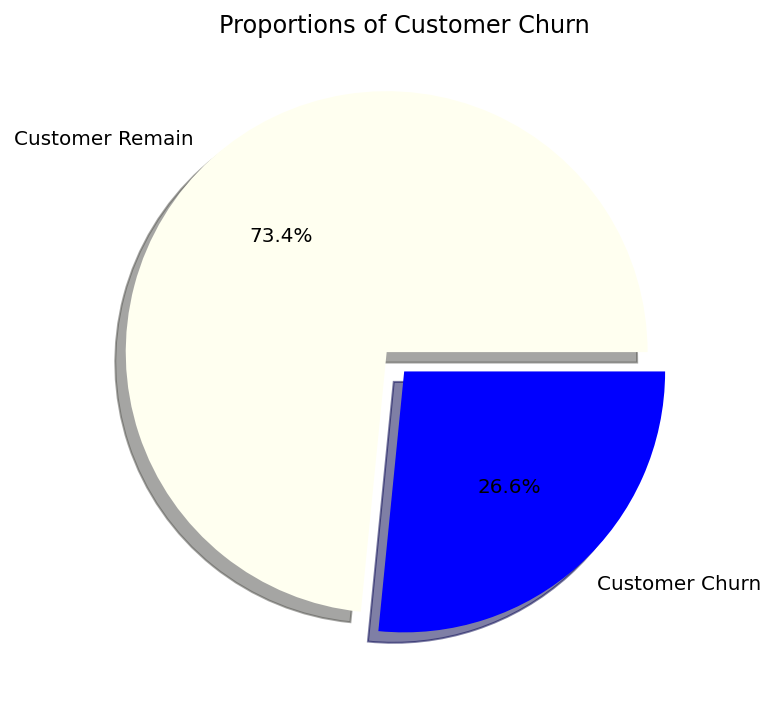

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7032.000000  7032.000000     7032.000000   7032.000000
mean        0.162400    32.421786       64.798208   2283.300441
std         0.368844    24.545260       30.085974   2266.771362
min         0.000000     1.000000       18.250000     18.800000
25%         0.000000     9.000000       35.587500    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.862500   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [0]:
# check the churn label and plot the Proportions of Customer Churn

churnvalue = data["Churn"].value_counts()
print(churnvalue)
label = data["Churn"].value_counts().index
print(label)
rcParams["figure.figsize"]=6,6
plt.pie(churnvalue,labels=["Customer Remain","Customer Churn"],colors=["ivory","blue"], explode=(0.1,0),autopct='%1.1f%%', shadow=True)
plt.title("Proportions of Customer Churn")
plt.show()
data.describe()

Text(0.5, 1.0, 'Churn by Dependents')

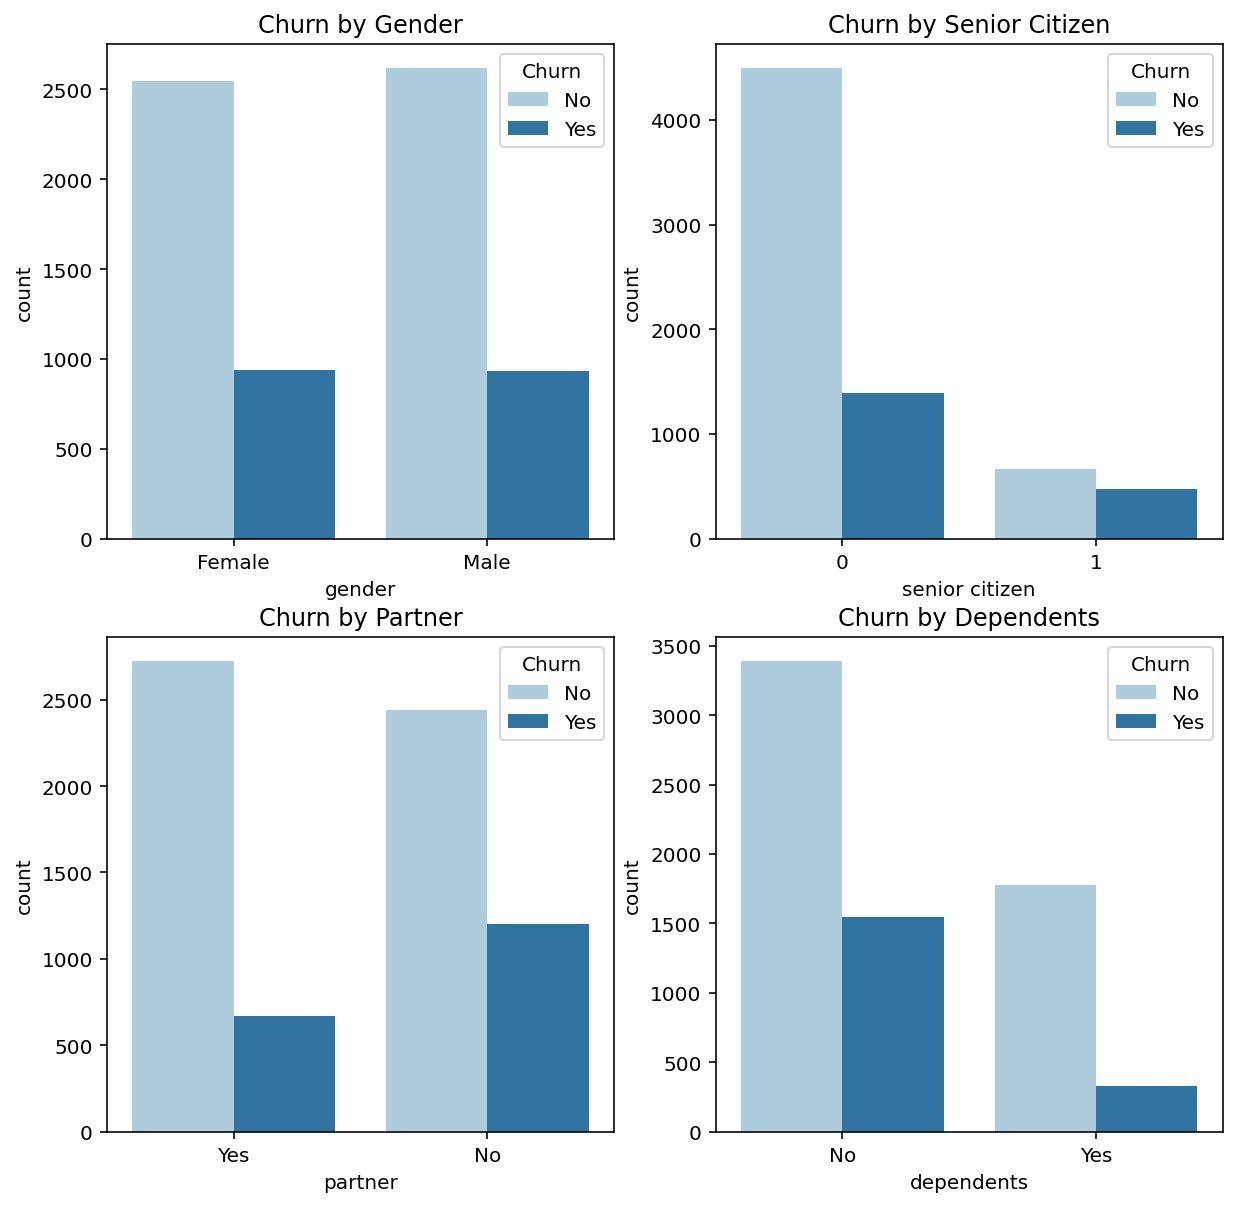

In [0]:
# Plot of Churn vs Binary Features (Gender, Senior Citizen, Partner, Dependents)
# to see how they are related to the Target (Churn_Yes).

# catagorical feature analysis
f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplot(2,2,1)
gender=sns.countplot(x="gender",hue="Churn",data=data,palette="Paired") 
plt.xlabel("gender")
plt.title("Churn by Gender")

plt.subplot(2,2,2)
seniorcitizen=sns.countplot(x="SeniorCitizen",hue="Churn",data=data,palette="Paired")
plt.xlabel("senior citizen")
plt.title("Churn by Senior Citizen")

plt.subplot(2,2,3)
partner=sns.countplot(x="Partner",hue="Churn",data=data,palette="Paired")
plt.xlabel("partner")
plt.title("Churn by Partner")

plt.subplot(2,2,4)
dependents=sns.countplot(x="Dependents",hue="Churn",data=data,palette="Paired")
plt.xlabel("dependents")
plt.title("Churn by Dependents")

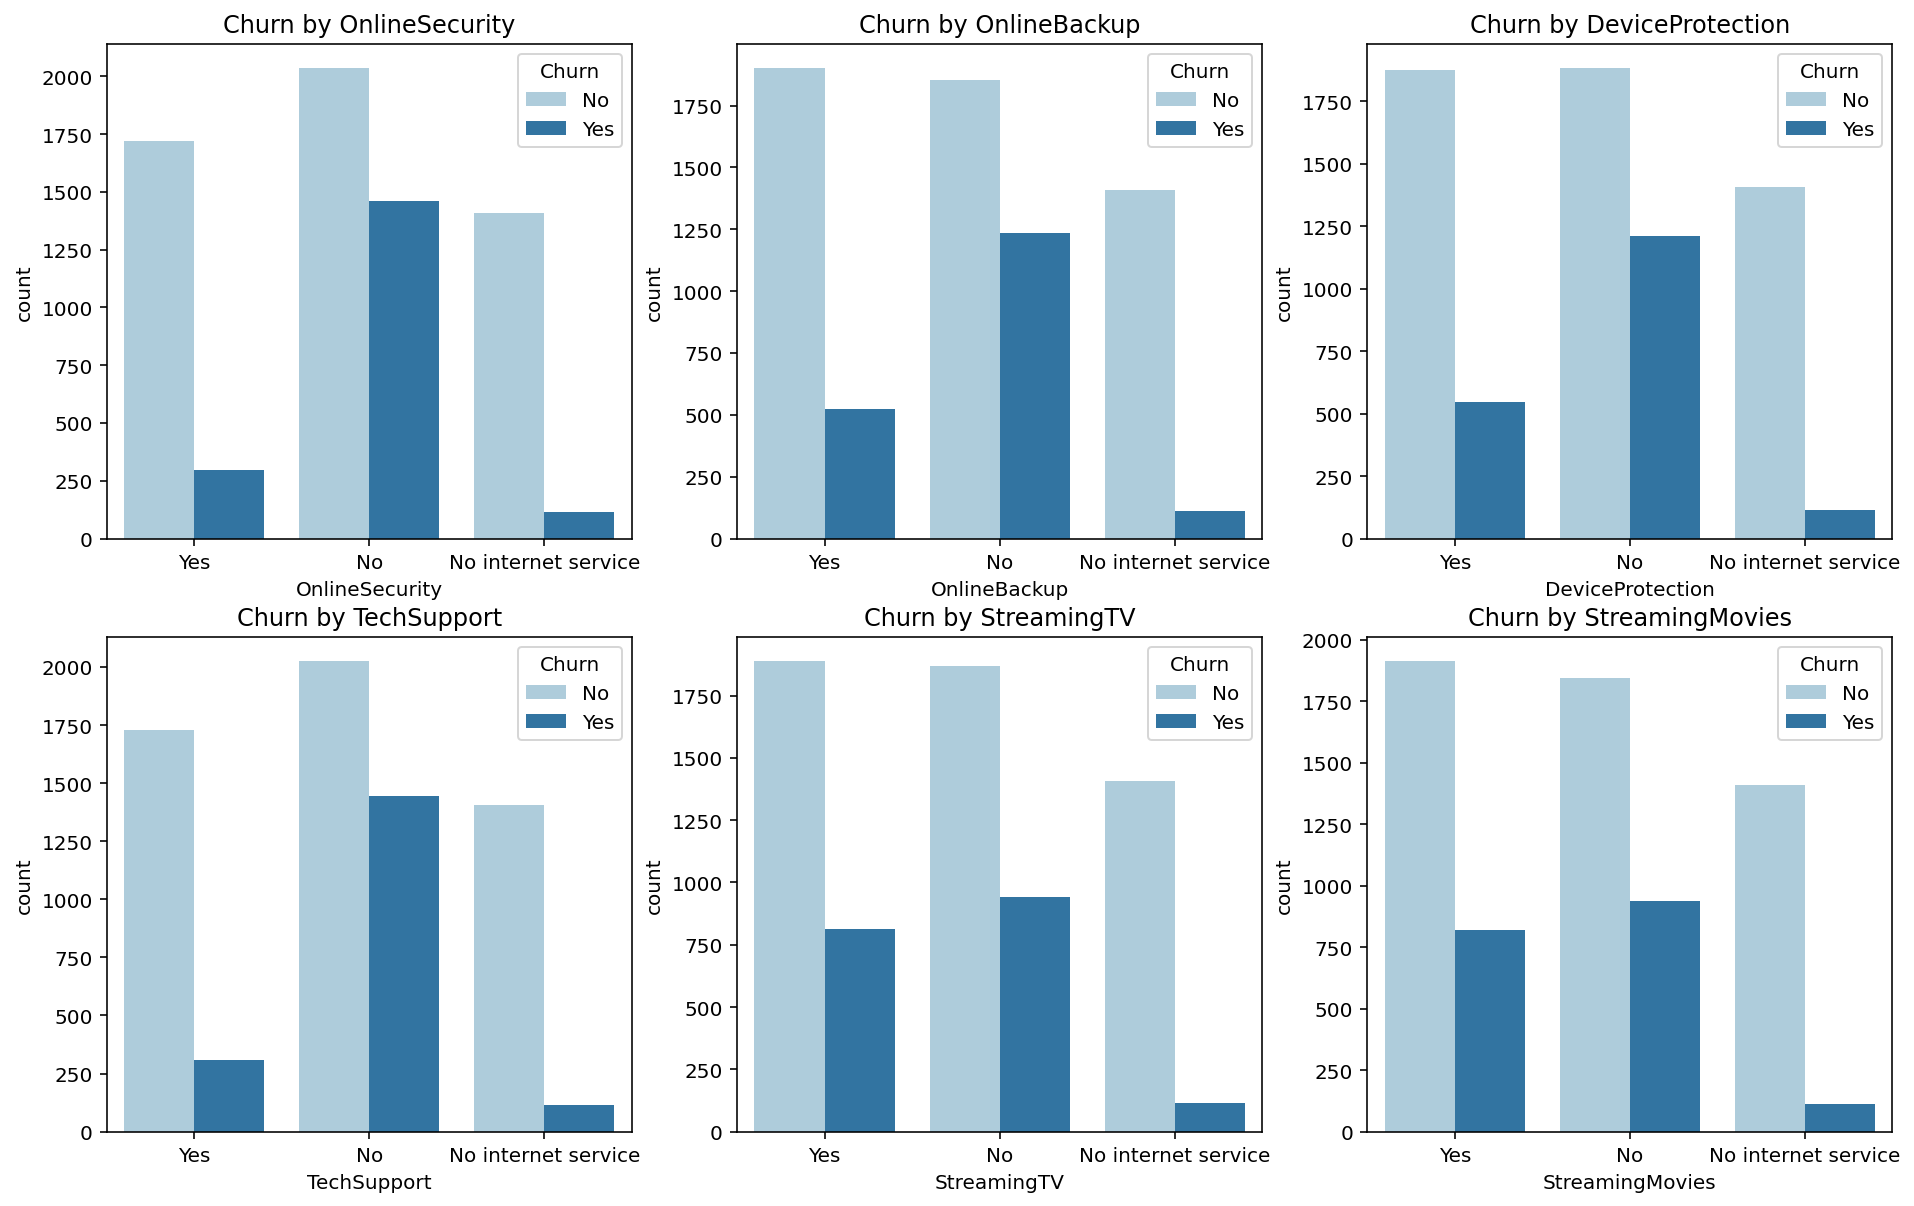

Text(0.5, 1.0, 'Churn by PaperlessBilling')

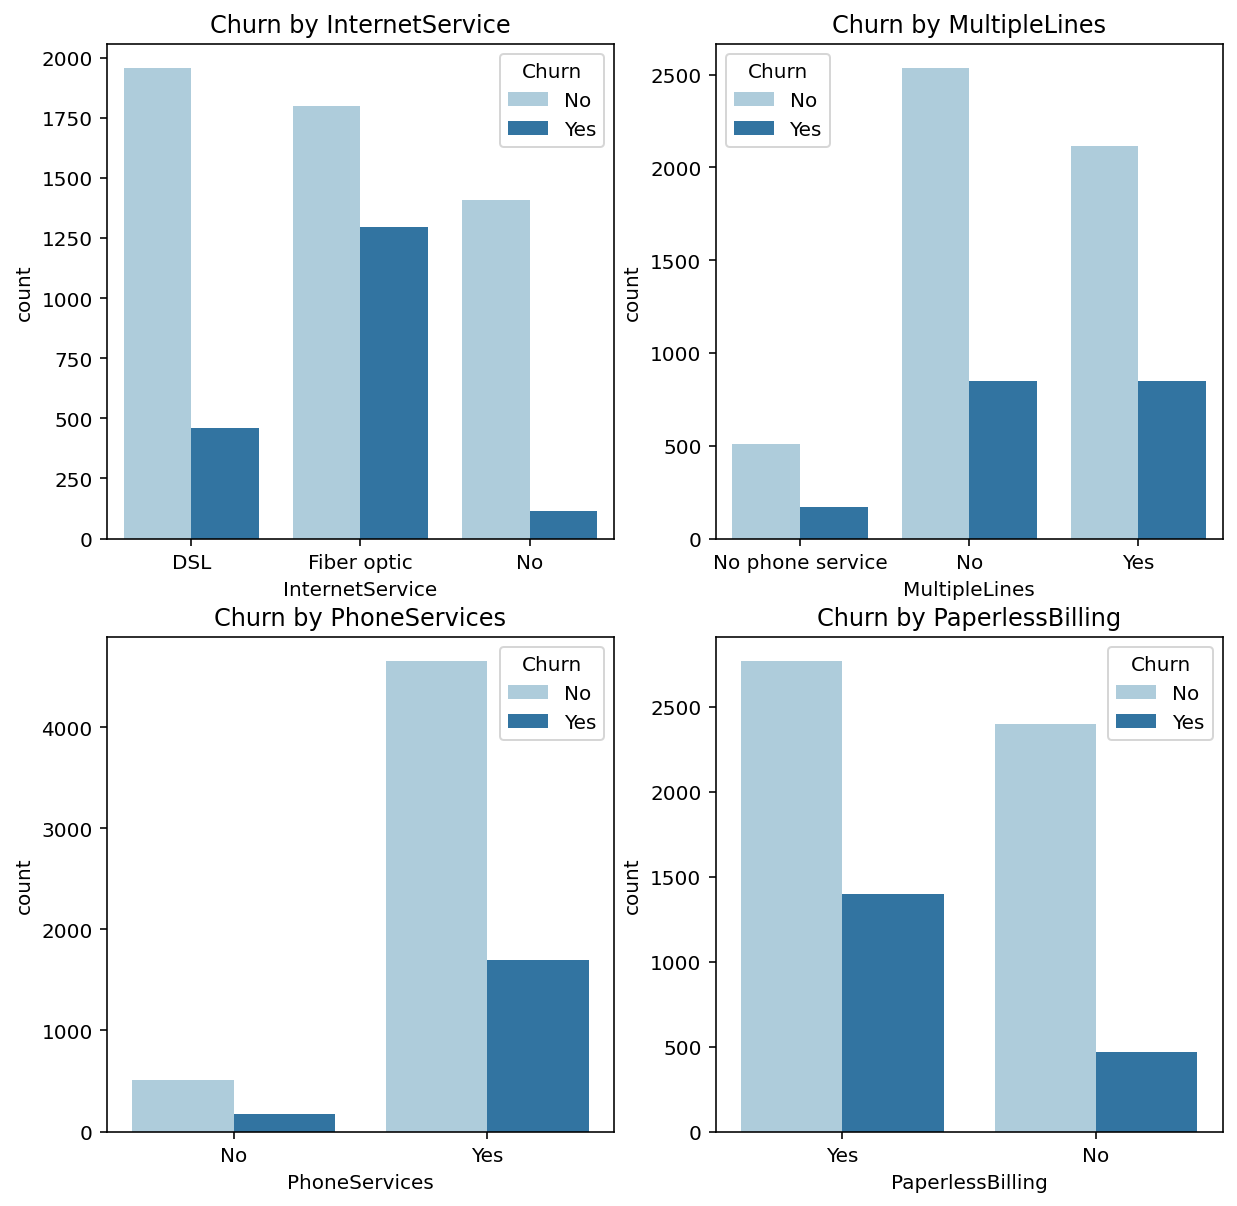

In [0]:
# Plot of Churn vs Other Categorical Features (OnlineSecurity, OnlineBackup, 
# DeviceProtection, TechSupport, StreamingTV, StreamingMovies, InternetService, 
# MultipleLines, PhoneService, PaperlessBilling)
# to see how they are related to the Target (Churn_Yes).

Variables=["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,10))
for i, item in enumerate(Variables):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=data,palette="Paired",order=["Yes","No","No internet service"])
    plt.xlabel(str(item))
    plt.title("Churn by "+ str(item))
    i=i+1
plt.show()


f, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
plt.subplot(2,2,1)
InternetService=sns.countplot(x="InternetService",hue="Churn",data=data,palette="Paired") 
plt.xlabel("InternetService")
plt.title("Churn by InternetService")
plt.subplot(2,2,2)
MultipleLines=sns.countplot(x="MultipleLines",hue="Churn",data=data,palette="Paired") 
plt.xlabel("MultipleLines")
plt.title("Churn by MultipleLines")
plt.subplot(2,2,3)
PhoneService=sns.countplot(x="PhoneService",hue="Churn",data=data,palette="Paired") 
plt.xlabel("PhoneServices")
plt.title("Churn by PhoneServices")
plt.subplot(2,2,4)
PaperlessBilling=sns.countplot(x="PaperlessBilling",hue="Churn",data=data,palette="Paired") 
plt.xlabel("PaperlessBilling")
plt.title("Churn by PaperlessBilling")

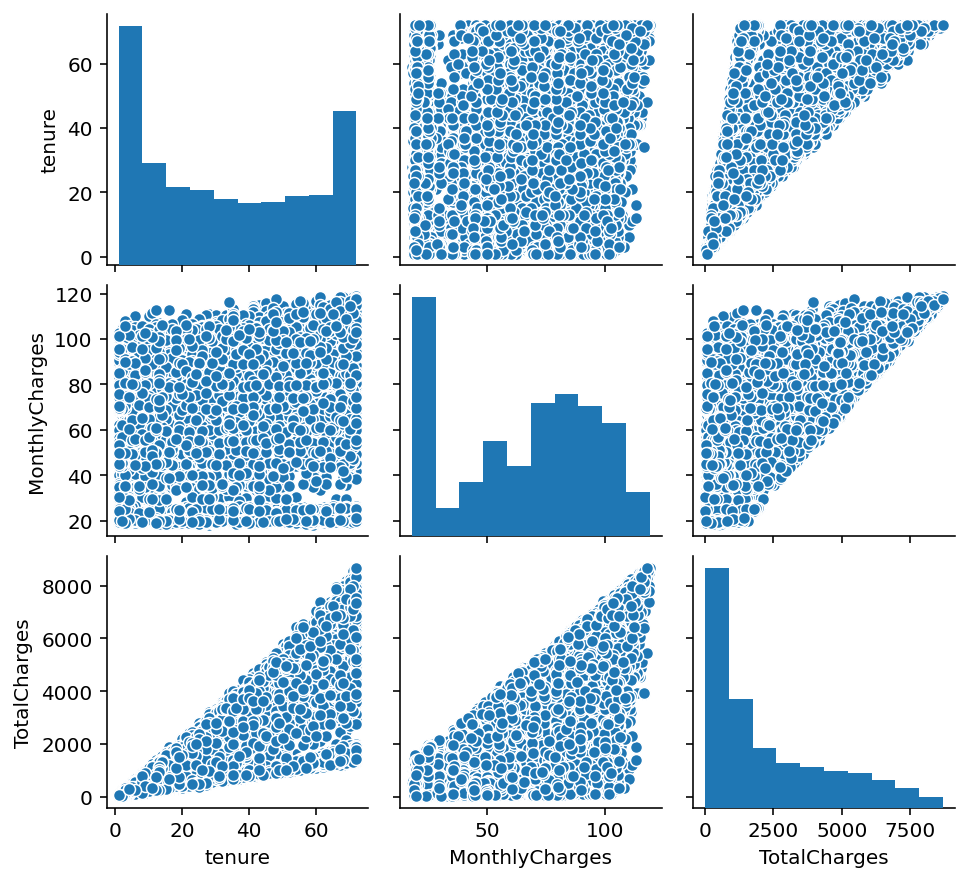

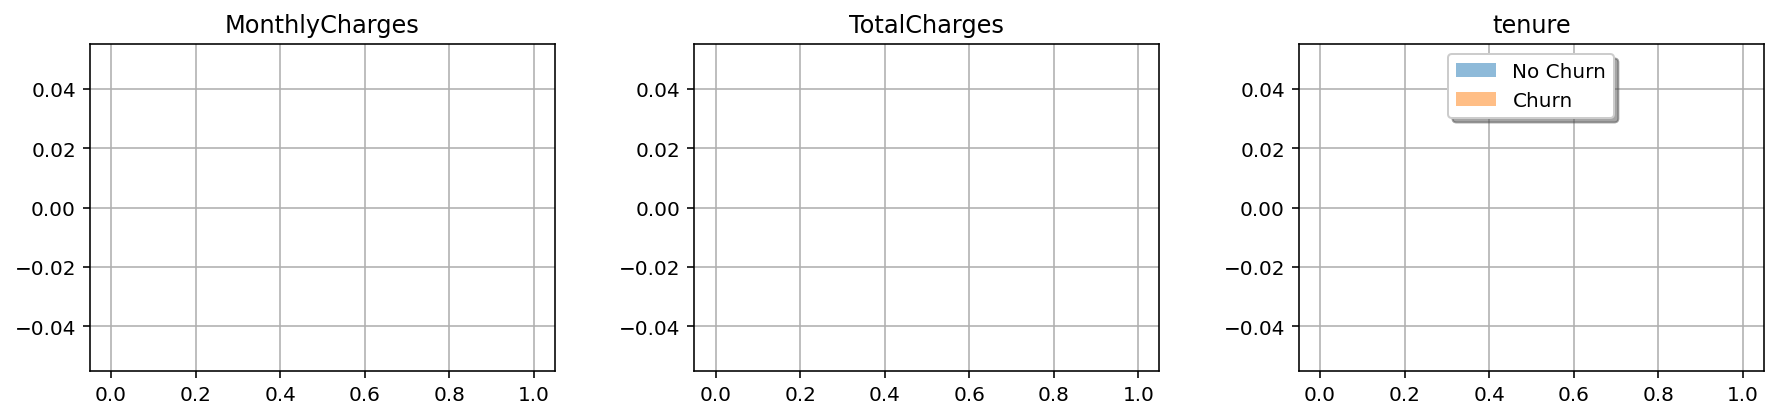

In [0]:
# Plot of Churn vs Numerical Features (Tenure, MonthlyCharges, TotalCharges)
# to see how they are related to the Target (Churn_Yes).

# numerical feature analysis
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
sns.pairplot(data[num_cols], height=2, aspect=1.1);
fig, ax = plt.subplots(1, 3, figsize=(15, 3))
data[data.Churn == 0][num_cols].hist(bins=20, alpha=0.5, ax=ax)
data[data.Churn == 1][num_cols].hist(bins=20, alpha=0.5, ax=ax)
plt.legend(['No Churn', 'Churn'], shadow=True, loc=9)

## Process the dataset

In [0]:
# create dummy variables for categorical features

all_cols = data.columns.to_list()
categorical_cols = data.select_dtypes(include='O').columns.values.tolist()
non_cat_cols = [c for c in all_cols if c not in categorical_cols]
categorical_cols.remove('customerID')
categorical_cols.remove('Churn')
non_cat_cols.remove('SeniorCitizen')
data = pd.get_dummies(data=data,columns=categorical_cols)#,drop_first=True)
data['Churn_Yes']=data['Churn'].map({'Yes': 1, 'No': 0})
data=data.drop('Churn',axis=1)

#can also do:
# newData = pd.get_dummies(newData, columns=['gender','Partner','Dependents','PhoneService',
#                                                'MultipleLines','InternetService','OnlineSecurity',
#                                                'OnlineBackup','DeviceProtection','TechSupport',
#                                                'StreamingTV','StreamingMovies','Contract',
#                                                'PaperlessBilling','PaymentMethod','Churn'], drop_first=True)

# newData['TotalCharges'] = pd.to_numeric(newData.TotalCharges, errors = 'coerce')
# newData.drop(['TotalCharges'], axis = 1, inplace = True)


In [0]:
# standardize the numerical features as per the Center-Limit Theorem using 
# the StandardScaler scaling function

std_scaler = preprocessing.StandardScaler()
data[['tenure','MonthlyCharges','TotalCharges']]= std_scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])
data.head(5)

#can also use min-max

# min_max_scaler = preprocessing.MinMaxScaler() # min-max 
# data[['tenure','MonthlyCharges','TotalCharges']]= min_max_scaler.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])
# data.head(5)

customerID  SeniorCitizen  ...  PaymentMethod_Mailed check  Churn_Yes
0  7590-VHVEG              0  ...                           0          0
1  5575-GNVDE              0  ...                           1          0
2  3668-QPYBK              0  ...                           1          1
3  7795-CFOCW              0  ...                           0          0
4  9237-HQITU              0  ...                           0          1

[5 rows x 47 columns]

In [0]:
# check for Null values again

data.isnull().sum()

customerID                                 0
SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   SeniorCitizen                            7032 non-null   int64  
 2   tenure                                   7032 non-null   float64
 3   MonthlyCharges                           7032 non-null   float64
 4   TotalCharges                             7032 non-null   float64
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

## Transfer the processed data into a new CSV file

In [0]:
# transfer the cleaned Telecom Churn dataset to a new csv file

data.to_csv('Processed_Telco_Customer_Churn.csv', index=False)

In [0]:
# read the cleaned data

processedData = pd.read_csv('/content/Processed_Telco_Customer_Churn.csv')

## Correlation Plots

Text(0.5, 1.0, 'Correlation Between Each Variable')

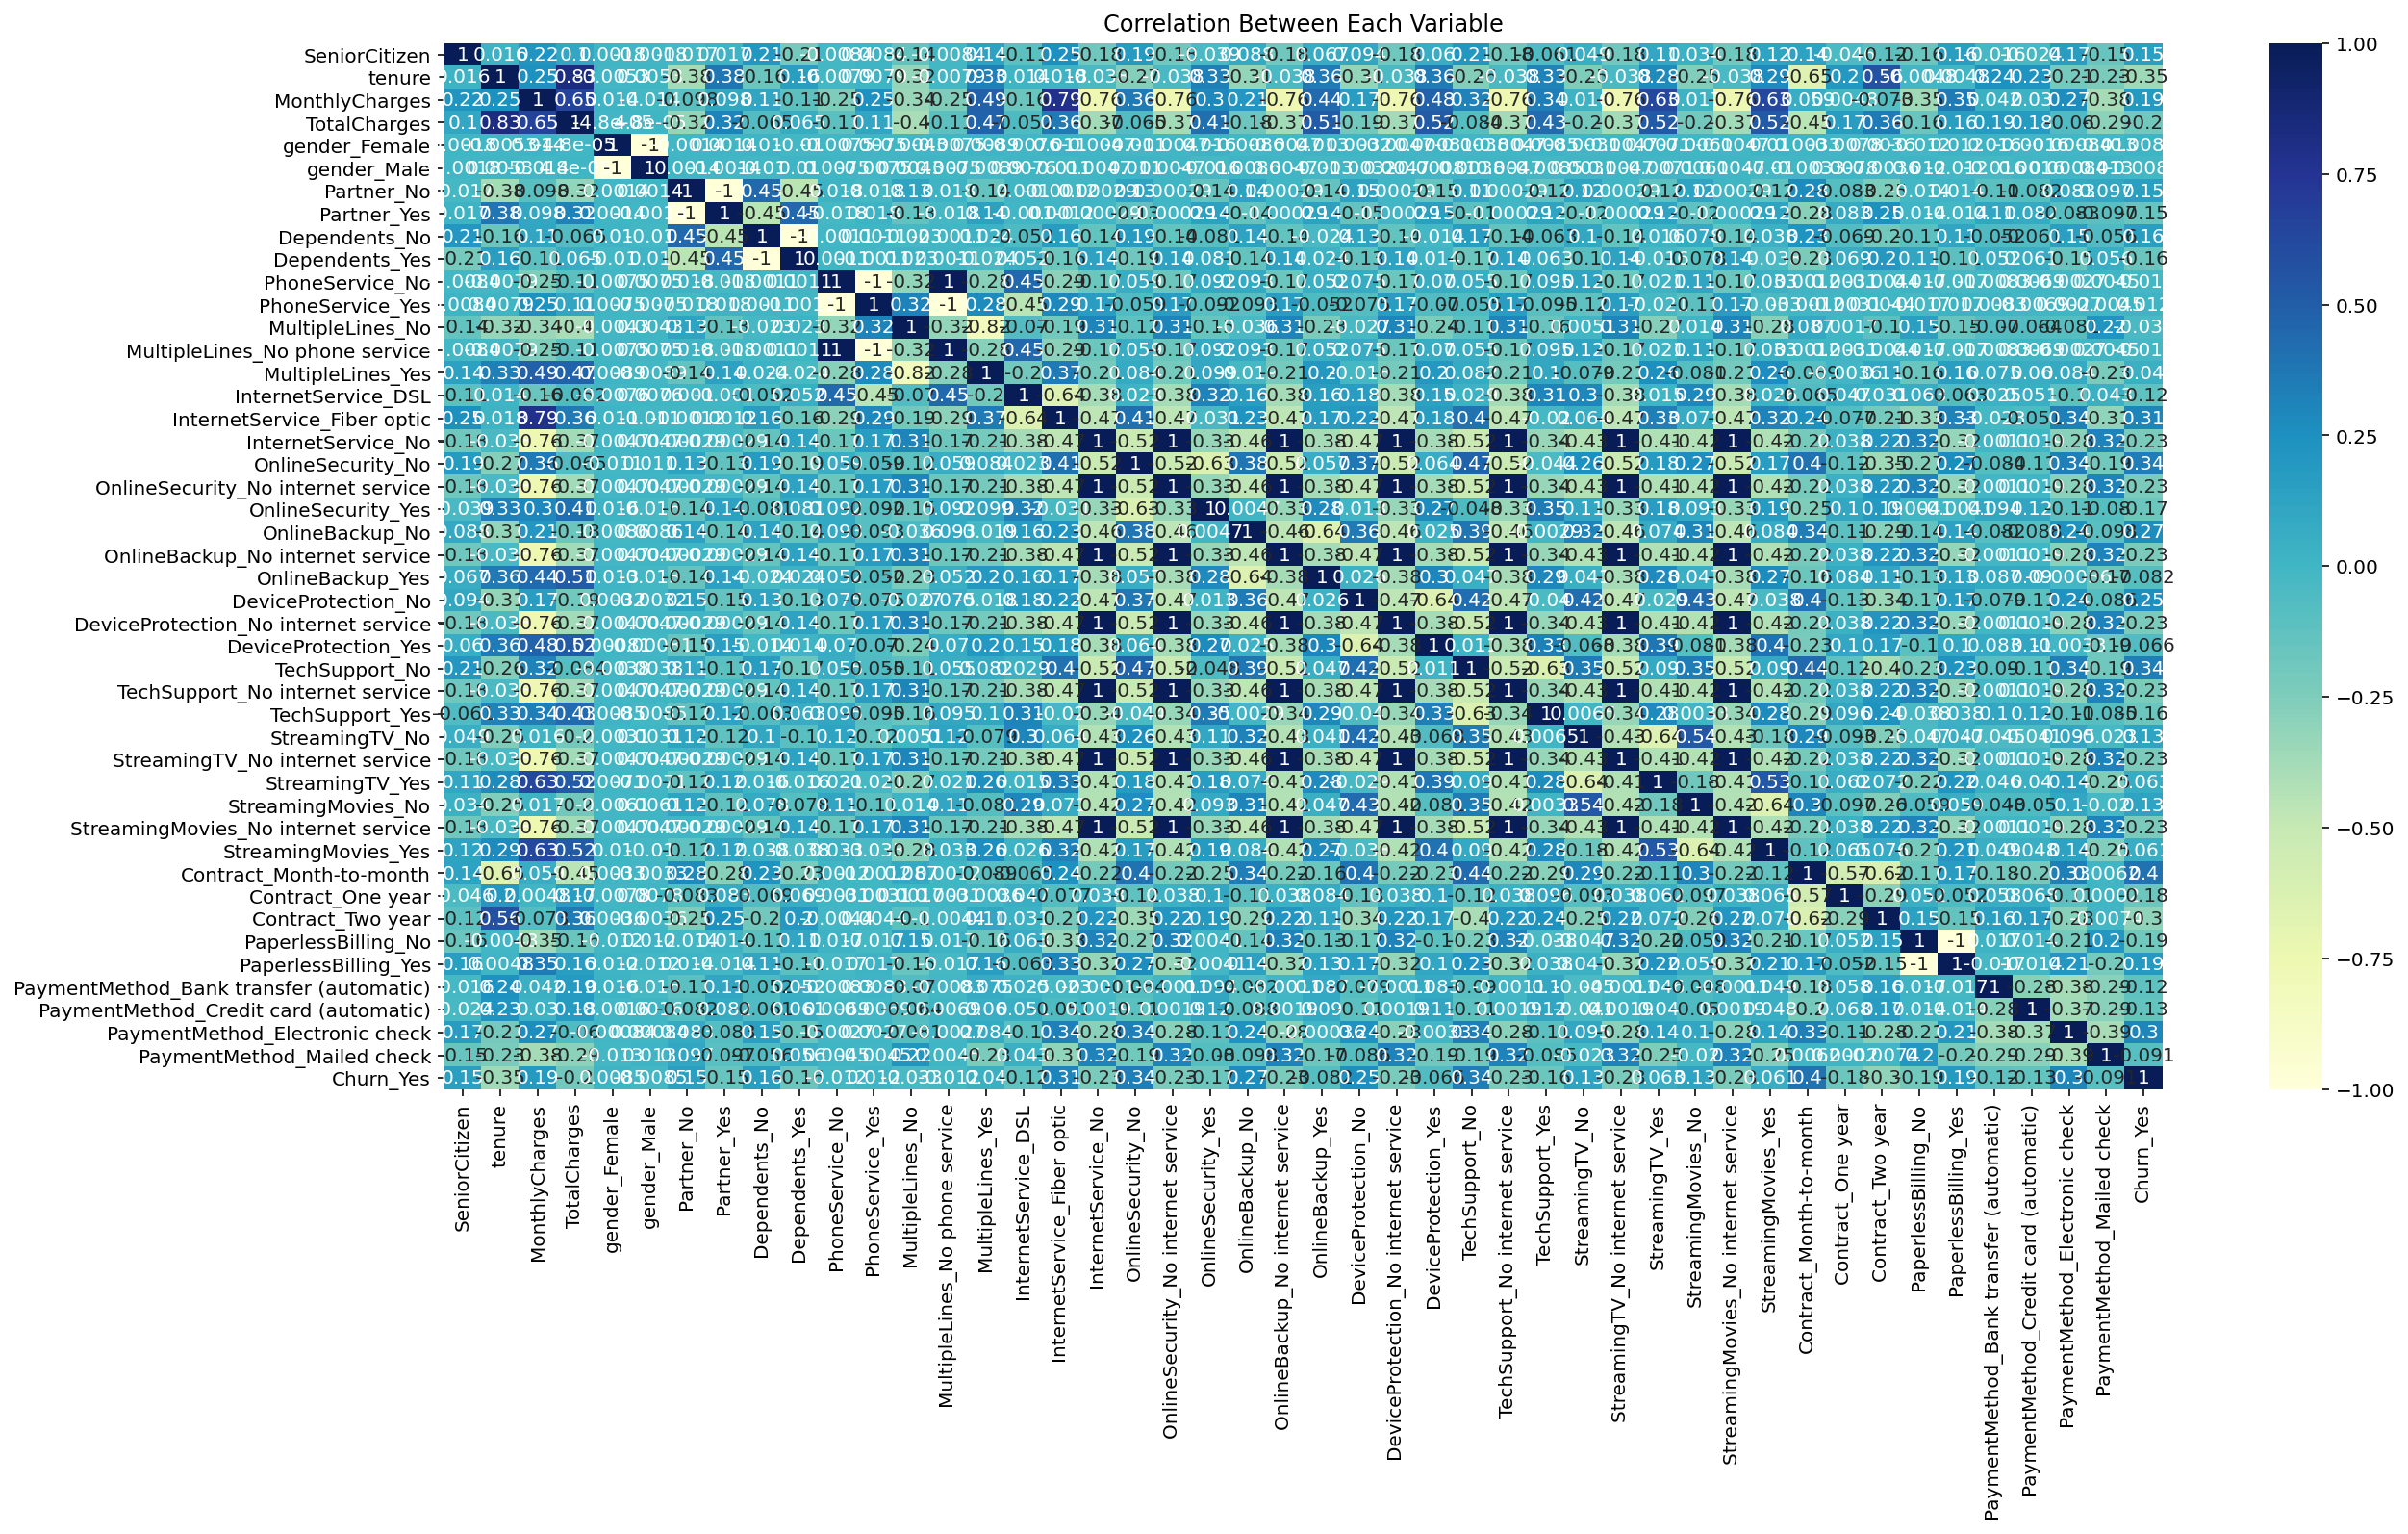

In [0]:
# Plot the correlation between each variable

corr = processedData.corr()
fig = plt.figure(figsize=(20,10))
sns.heatmap(corr,center=0,cmap="YlGnBu",annot=True)
plt.title("Correlation Between Each Variable")

In [0]:
#drop the correlated columns
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
corr_to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
corr_to_drop

['MultipleLines_No phone service',
 'OnlineSecurity_No internet service',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'StreamingTV_No internet service',
 'StreamingMovies_No internet service']

In [0]:
processedData = processedData.drop(columns=corr_to_drop,axis=1)

In [0]:
processedData.head()

customerID  SeniorCitizen  ...  PaymentMethod_Mailed check  Churn_Yes
0  7590-VHVEG              0  ...                           0          0
1  5575-GNVDE              0  ...                           1          0
2  3668-QPYBK              0  ...                           1          1
3  7795-CFOCW              0  ...                           0          0
4  9237-HQITU              0  ...                           0          1

[5 rows x 40 columns]

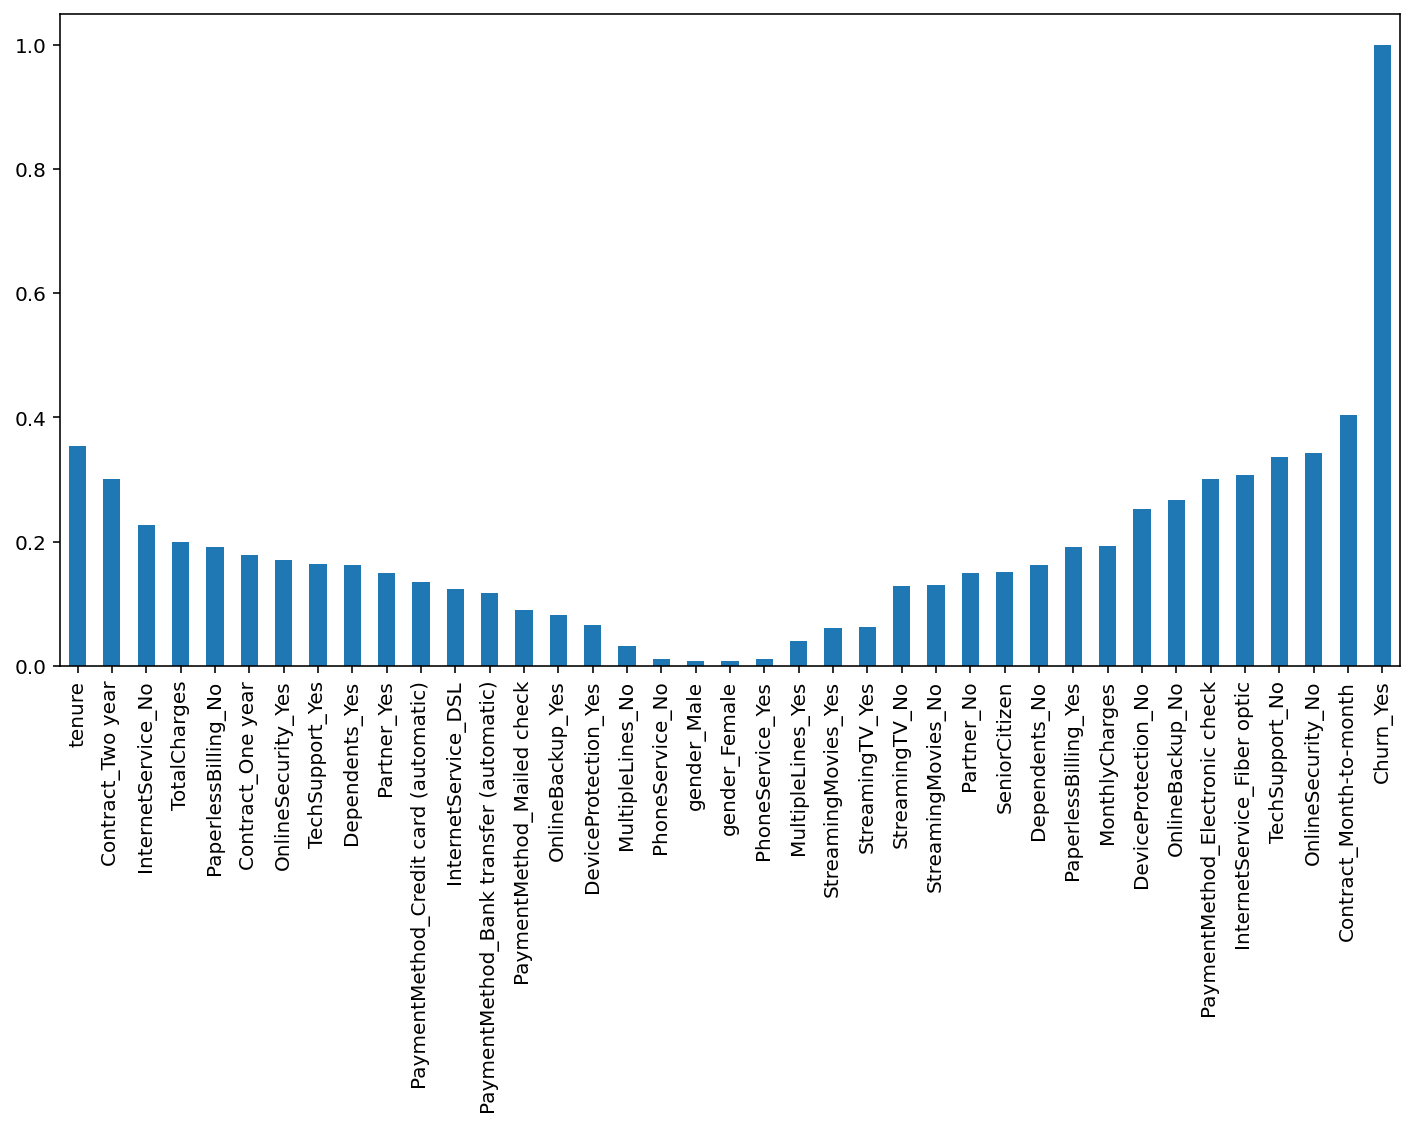

In [0]:
#bar plot of correlations
corr_Churn = processedData.corr()['Churn_Yes'].sort_values().abs()
corr_Churn
fig = plt.figure(figsize=(12,6))
corr_Churn.plot(kind='bar')

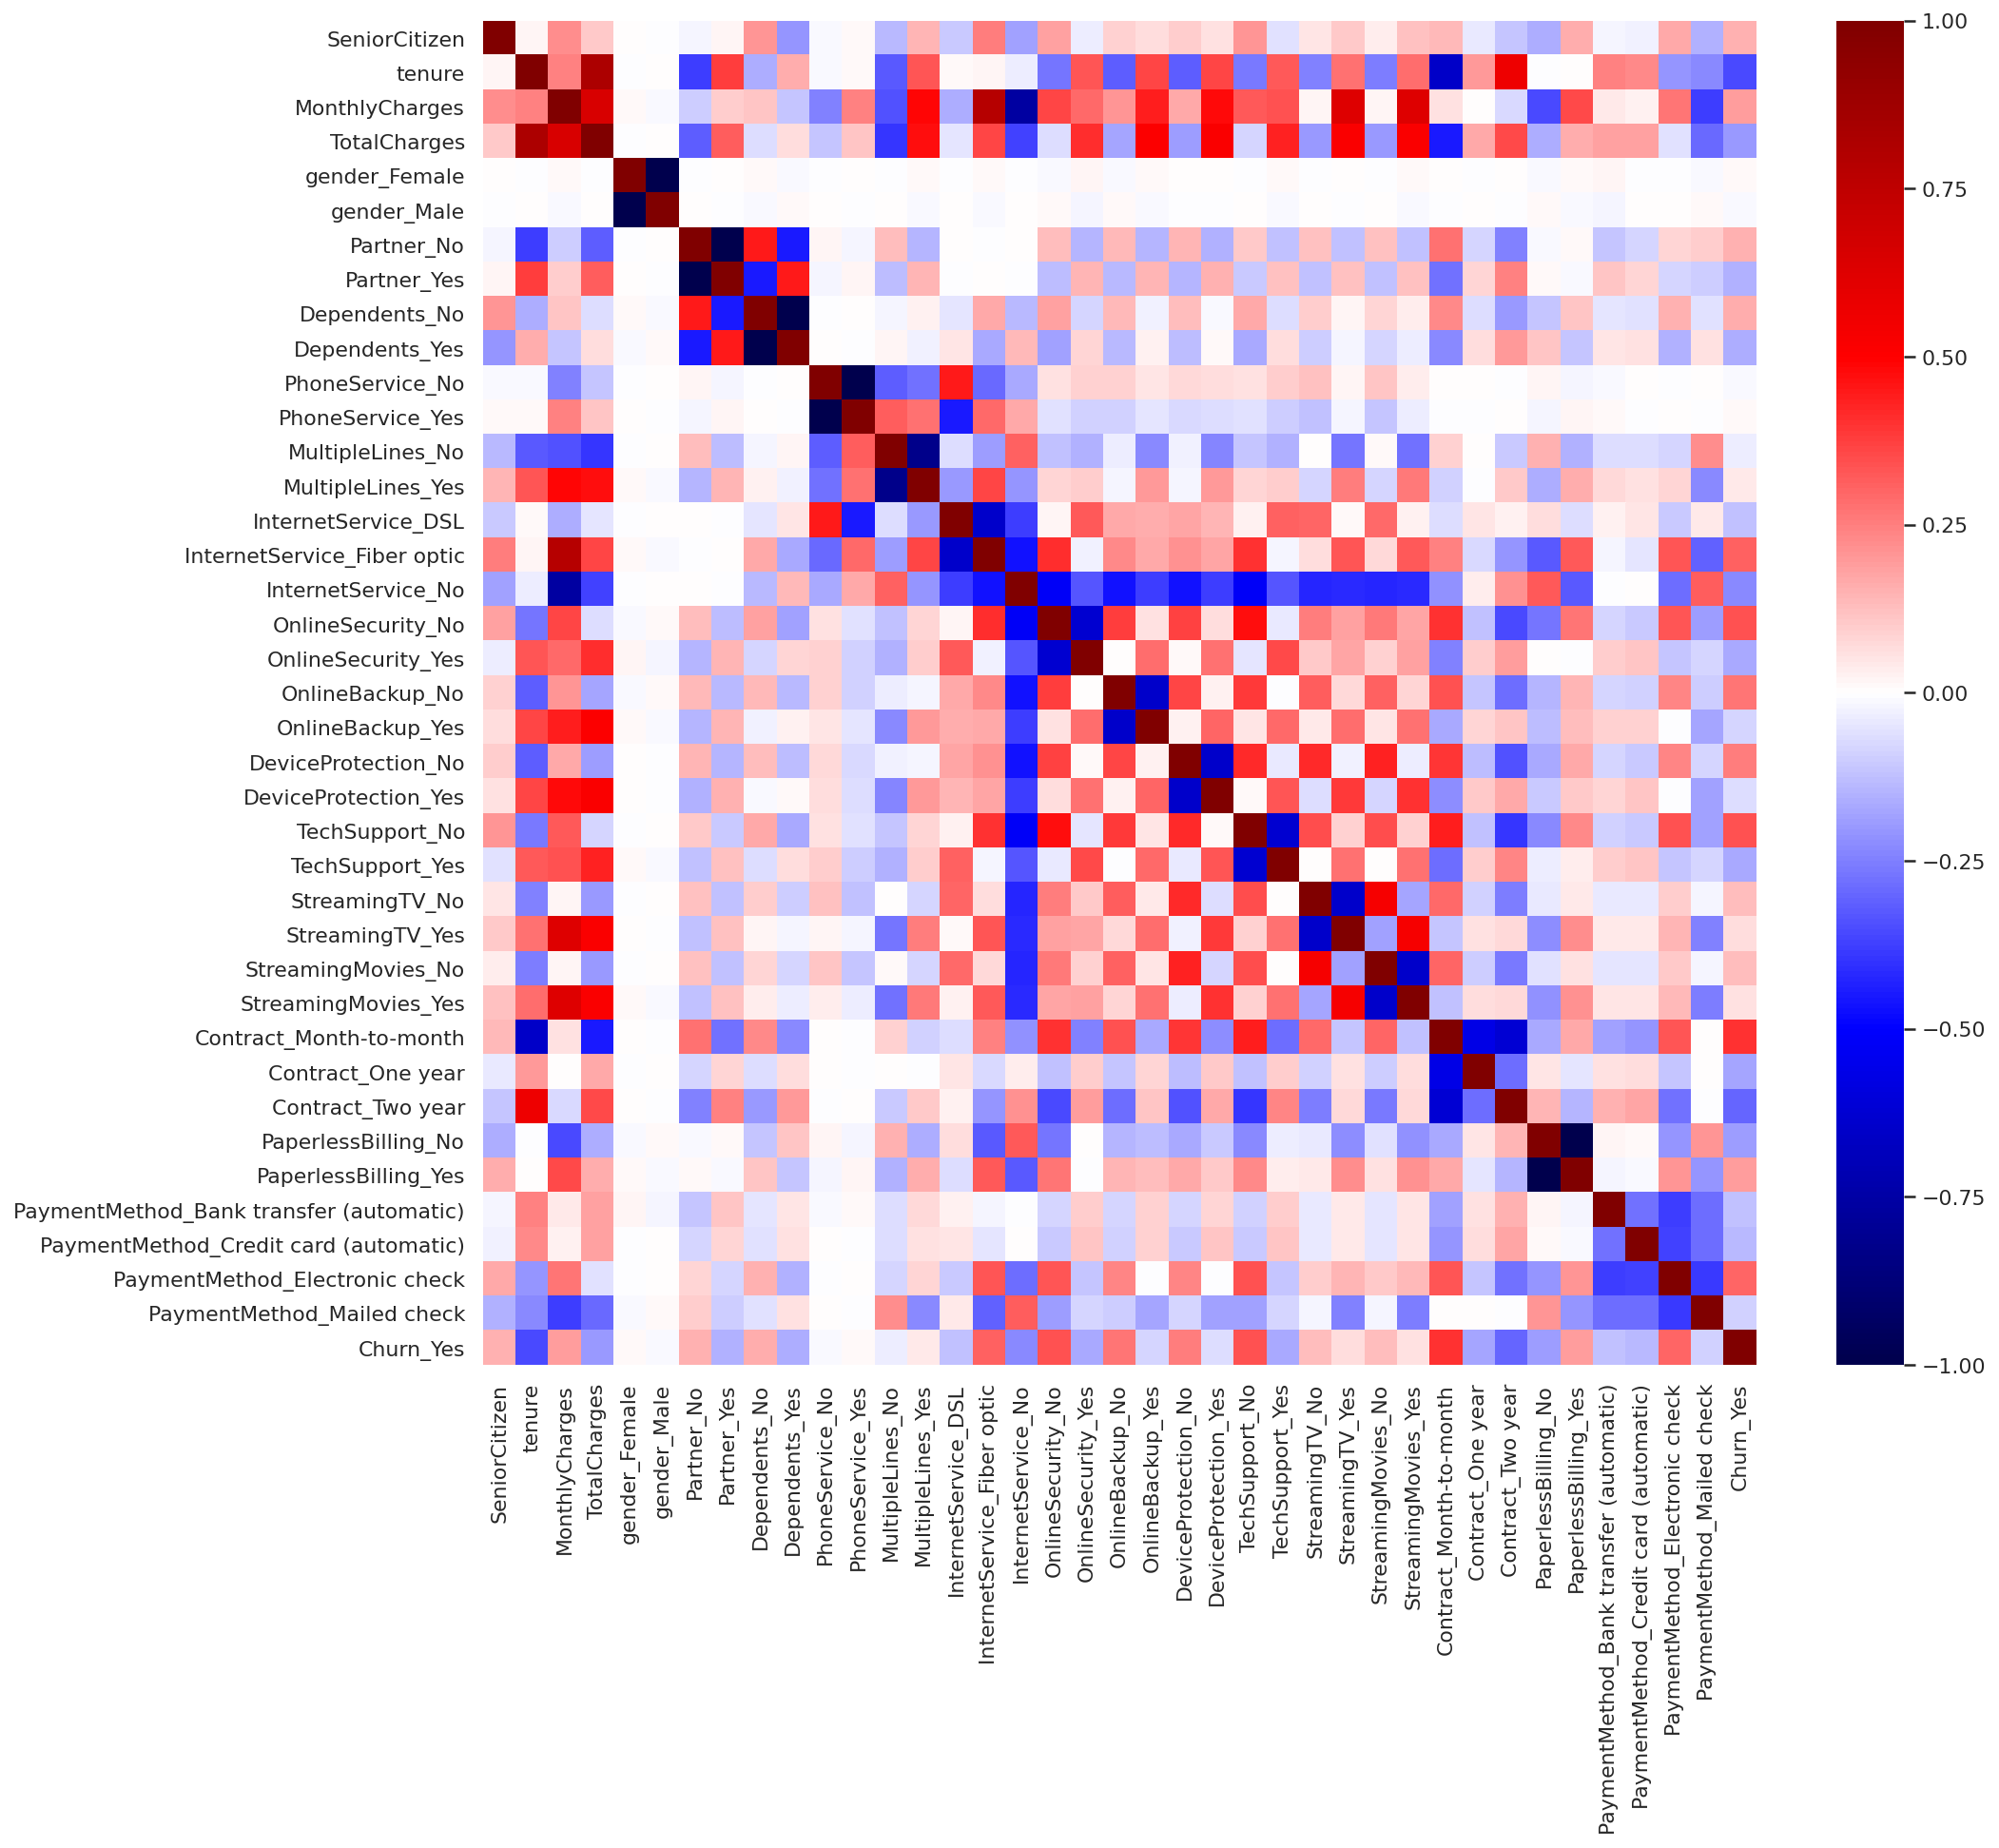

In [0]:
# Heatmap showing correlation matrix for variables
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(processedData.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1)

## Divide the dataset into features (X) and target (Y) labels

In [0]:
# divide the dataset into the target label and DataFrame consisting of features

target = 'Churn_Yes'
X_data = processedData.drop(columns=['customerID',target], axis=1)
y_data = processedData[target]

## Divide the dataset into training & testing data 

Used to validate the models on the untrained raw test data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=.2, stratify=y_data, random_state=50)

In [0]:
print(np.unique(y_test,return_counts=True))

(array([0, 1]), array([1033,  374]))


## Apply the Models

## Ordinary Least Squares

In [0]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Churn_Yes   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     98.53
Date:                Mon, 11 May 2020   Prob (F-statistic):               0.00
Time:                        17:40:38   Log-Likelihood:                -2430.2
No. Observations:                5625   AIC:                             4908.
Df Residuals:                    5601   BIC:                             5068.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
const                                    2.483e+11   1.26e+11      1.965      0.049    5.57e+08    4.96e+11
SeniorCitizen                               0.0396      0.015      2.718      0.007       0.011       0.068
tenure                                     -0.0426      0.014     -3.114      0.002      -0.069      -0.016
MonthlyCharges                             -0.0096      0.146     -0.065      0.948      -0.296       0.277
TotalCharges                               -0.1051      0.016     -6.441      0.000      -0.137      -0.073
gender_Female                           -2.135e+11   1.09e+11     -1.965      0.049   -4.26e+11   -4.79e+08
gender_Male                             -2.135e+11   1.09e+11     -1.965      0.049   -4.26e+11   -4.79e+08
Partner_No                              -1.877e+11   9.55e+10     -1.965      0.049   -3.75e+11   -4.21e+08
Partner_Yes                             -1.877e+11   9.55e+10     -1.965      0.049   -3.75e+11   -4.21e+08
Dependents_No                            9.101e+10   4.63e+10      1.965      0.049    2.04e+08    1.82e+11
Dependents_Yes                           9.101e+10   4.63e+10      1.965      0.049    2.04e+08    1.82e+11
PhoneService_No                          4.388e+11   2.23e+11      1.965      0.049    9.85e+08    8.77e+11
PhoneService_Yes                         8.339e+11   4.24e+11      1.965      0.049    1.87e+09    1.67e+12
MultipleLines_No                        -3.952e+11   2.01e+11     -1.965      0.049   -7.89e+11   -8.87e+08
MultipleLines_Yes                       -3.952e+11   2.01e+11     -1.965      0.049   -7.89e+11   -8.87e+08
InternetService_DSL                      -9.59e+10   4.88e+10     -1.965      0.049   -1.92e+11   -2.15e+08
InternetService_Fiber optic              -9.59e+10   4.88e+10     -1.965      0.049   -1.92e+11   -2.15e+08
InternetService_No                      -1.457e+11   7.41e+10     -1.965      0.049   -2.91e+11   -3.27e+08
OnlineSecurity_No                        4.429e+11   2.25e+11      1.965      0.049    9.94e+08    8.85e+11
OnlineSecurity_Yes                       4.429e+11   2.25e+11      1.965      0.049    9.94e+08    8.85e+11
OnlineBackup_No                         -9.004e+10   4.58e+10     -1.965      0.049    -1.8e+11   -2.02e+08
OnlineBackup_Yes                        -9.004e+10   4.58e+10     -1.965      0.049    -1.8e+11   -2.02e+08
DeviceProtection_No                     -1.106e+11   5.63e+10     -1.965      0.049   -2.21e+11   -2.48e+08
DeviceProtection_Yes                    -1.106e+11   5.63e+10     -1.965      0.049   -2.21e+11   -2.48e+08
TechSupport_No                          -8.273e+10   4.21e+10     -1.965      0.049   -1.65e+11   -1.86e+08
TechSupport_Yes                         -8.273e+10   4.21e+

In [0]:
X_train=X_train.drop(columns=['const'],axis=1)

Since the data is unbalanced with 73% of the data belonging to class 'No' and 27% of the data belonging to class 'Yes',

Use SMOTE (Synthetic Minority Over-Sampling Technique) to over-sample the minority of the data records.

In [0]:
smote = SMOTE(random_state=12)

In [0]:
# Over-Sample the data that has all features
feature_names = X_test.columns

X_sampled, y_sampled = smote.fit_resample(X_train, y_train)
X_sampled = pd.DataFrame(data=X_sampled,columns=feature_names)

Now the data is equally balanced with 50% of data in each class

[0 1]
[4130 4130]


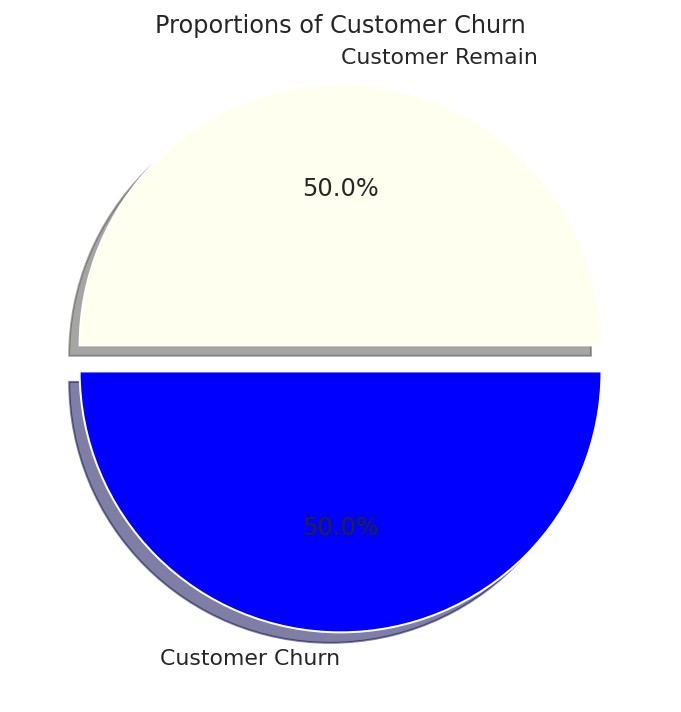

In [0]:
# Pie chart to display balanced data distribution among two classes

label,churnvalue = np.unique(y_sampled,return_counts=True)
print(label)
print(churnvalue)
rcParams["figure.figsize"]=6,6
plt.pie(churnvalue,labels=["Customer Remain","Customer Churn"],colors=["ivory","blue"], explode=(0.1,0),autopct='%1.1f%%', shadow=True)
plt.title("Proportions of Customer Churn")
plt.show()

In [0]:
#Function to plot the ROC Curve

def plot_roc_curve_custom(fpr, tpr, roc_auc):
    plt.plot(fpr, tpr, color='orange', label='ROC-AUC = %0.3f' % roc_auc)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.legend(loc = 'bottom right')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

Implement SVC (Support Vector Classifier) on the all-feature data without over-sampling using a 70-30% Train-Test split

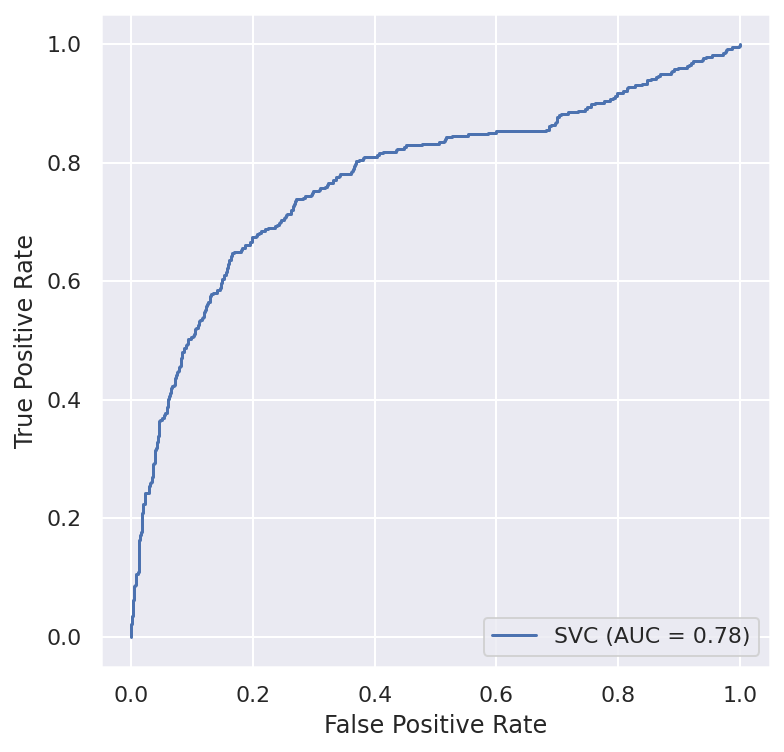

In [0]:
svc = SVC(random_state=37)
svc.fit(X_train, y_train)
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

Implement SVC on all-feature over-sampled data using a 70-30% Train-Test split

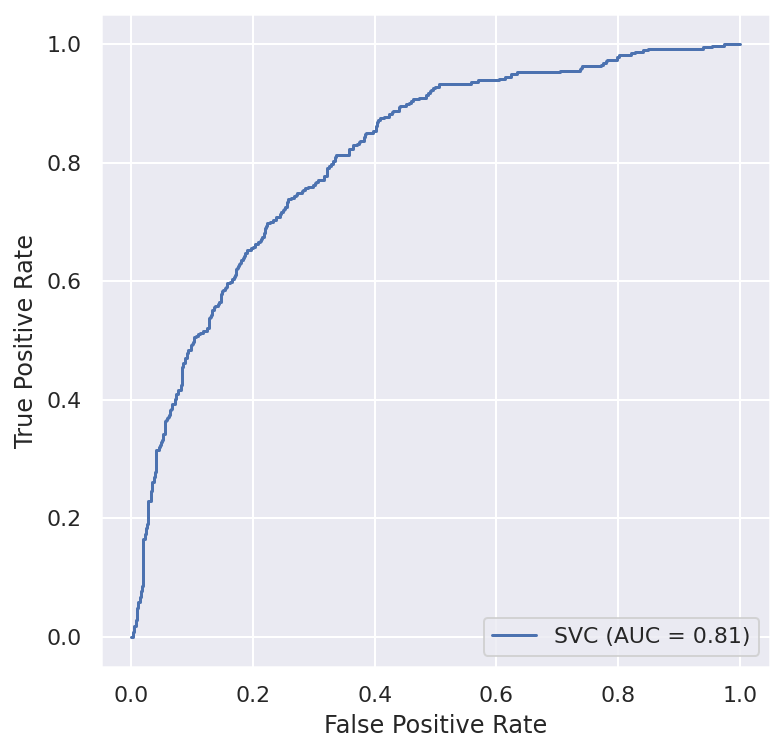

In [0]:
svc = SVC(random_state=42)
svc.fit(X_sampled, y_sampled)
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

AUC Score for Over-sampled data is better, thus try implementing algorithms by training model on both general and over-sampled dataset and compare them.



In [0]:
# Stratified k-Fold to divide data into 10 strats

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=35)

## Lasso Model on k=10 folds

Test AUC score = 0.8296

FOLD  0  AUC ............... 0.8308393866020984
FOLD  1  AUC ............... 0.8293301049233253
FOLD  2  AUC ............... 0.857772397094431
FOLD  3  AUC ............... 0.8522276029055691
FOLD  4  AUC ............... 0.8509765940274414
FOLD  5  AUC ............... 0.8326860262931244
FOLD  6  AUC ............... 0.7868761883094724
FOLD  7  AUC ............... 0.826673383492858
FOLD  8  AUC ............... 0.8687618830947235
FOLD  9  AUC ............... 0.862310479873897
Validation AUC-ROC : 0.8398454046616941


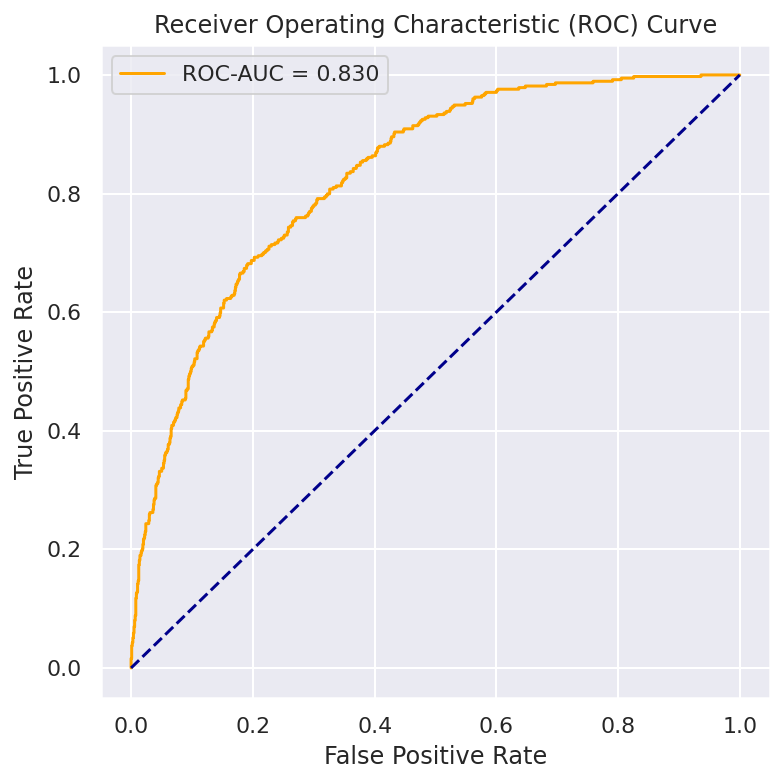

Test AUC:  0.829631518188548


In [0]:
fold=0
avg_val_auc=[]

lasso = Lasso(alpha=0.005)
for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]

  
  lasso.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = lasso.predict(X_val_cv)
  auc = roc_auc_score(y_val_cv, y_pred_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1


print("Validation AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_lasso = lasso.predict(X_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_lasso)
test_auc=roc_auc_score(y_test, y_hat_prob_lasso)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

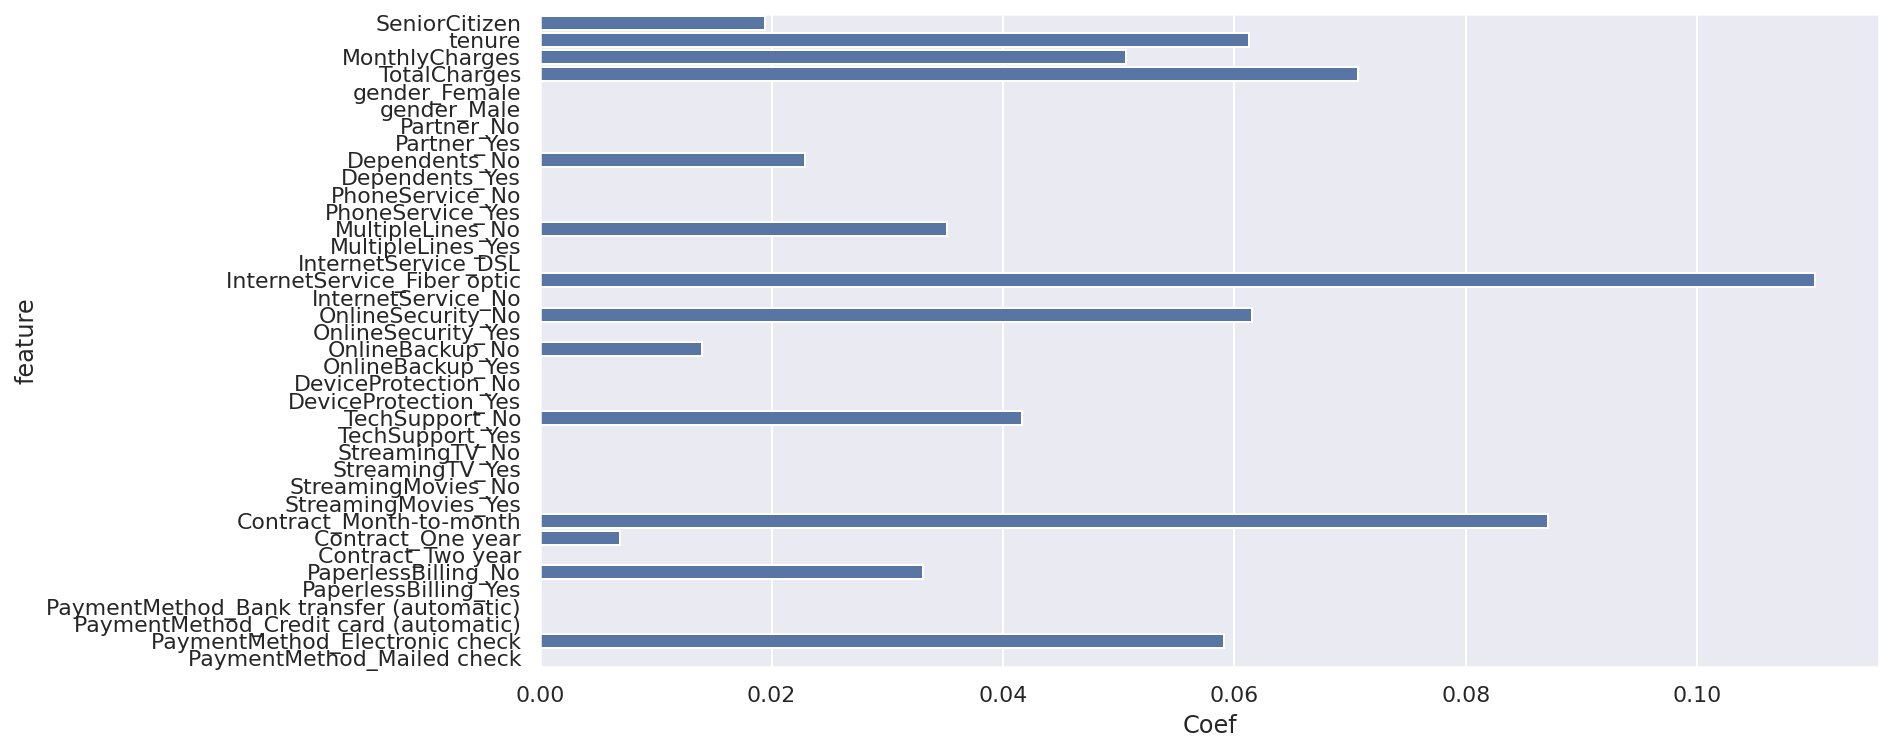

In [0]:
lasso_all_feature_cols = X_test.columns #features
lasso_X_Coef = lasso.coef_ #coefficients
z =list(zip(lasso_all_feature_cols, lasso_X_Coef)) 
lasso_data = pd.DataFrame(z)
lasso_data.columns = ["feature","Coef"]
feature = lasso_data["feature"]
coef = lasso_data['Coef'].sort_values().abs()

#plot features and their coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

# Lasso using Over-Sampled data on k=10 folds
Test AUC score=0.8305

FOLD  0  AUC ............... 0.8525816531726164
FOLD  1  AUC ............... 0.8588137352039351
FOLD  2  AUC ............... 0.8635215074251477
FOLD  3  AUC ............... 0.8377079070640034
FOLD  4  AUC ............... 0.8483311738944356
FOLD  5  AUC ............... 0.8637589479917219
FOLD  6  AUC ............... 0.8418294062813289
FOLD  7  AUC ............... 0.866746008946526
FOLD  8  AUC ............... 0.845212201513757
FOLD  9  AUC ............... 0.8499316991950471
Validation AUC-ROC : 0.8528434240688518


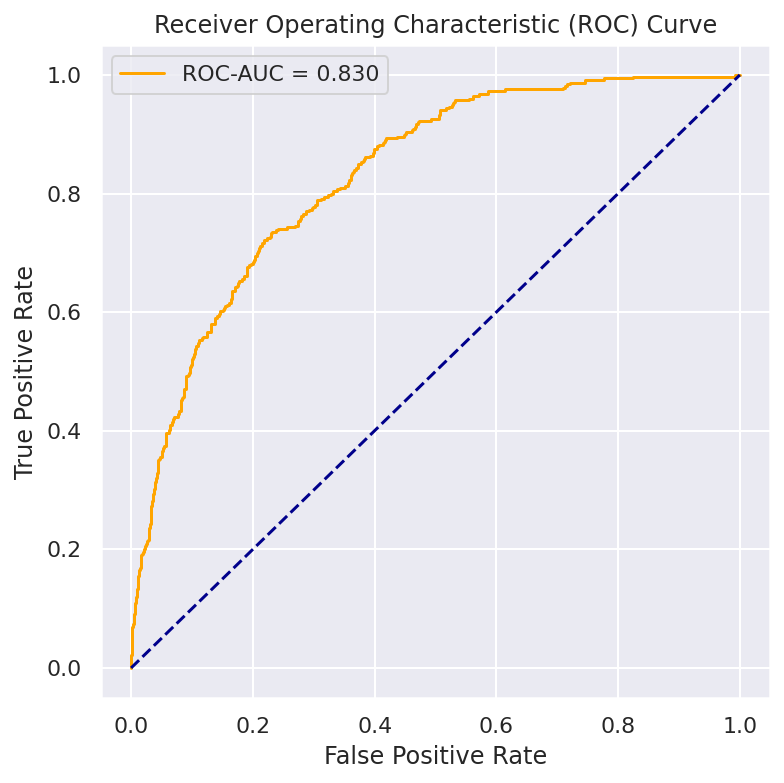

Test AUC:  0.8304869778589953


In [0]:
fold=0
avg_val_auc=[]

lasso2 = Lasso(alpha=0.00009)
for tr_idx, val_idx in kf.split(X_sampled,y_sampled):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_sampled.iloc[tr_idx], X_sampled.iloc[val_idx], y_sampled[tr_idx], y_sampled[val_idx]

  
  lasso2.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = lasso2.predict(X_val_cv)
  auc = roc_auc_score(y_val_cv, y_pred_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1


print("Validation AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_lasso2 = lasso2.predict(X_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_lasso2)
test_auc=roc_auc_score(y_test, y_hat_prob_lasso2)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

## Random Forest Classification Algorithm on k=10 folds

Test AUC score = 0.8315

FOLD  0  AUC ............... 0.8333010492332527
FOLD  1  AUC ............... 0.8372074253430185
FOLD  2  AUC ............... 0.8550524616626312
FOLD  3  AUC ............... 0.8523325262308313
FOLD  4  AUC ............... 0.8561581920903955
FOLD  5  AUC ............... 0.8410224742837642
FOLD  6  AUC ............... 0.8073923005671384
FOLD  7  AUC ............... 0.8235045582332581
FOLD  8  AUC ............... 0.8709800607764435
FOLD  9  AUC ............... 0.8645611583275103
Validation RF AUC-ROC : 0.8441512206748243


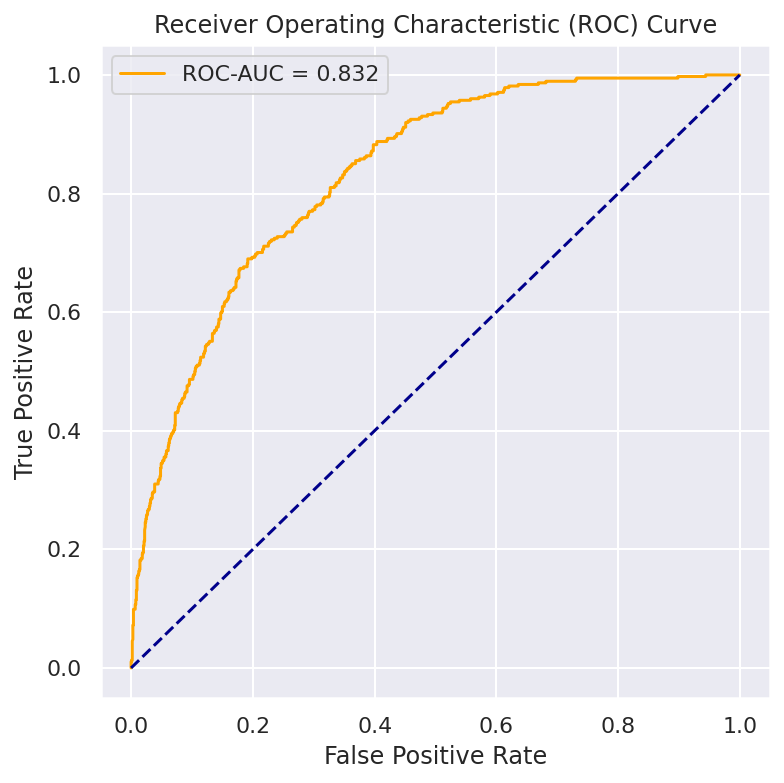

Test AUC:  0.8315184473859949


In [0]:
fold=0
avg_val_auc=[]
rfc = RandomForestClassifier(n_estimators=200,max_depth=4,max_features=6,random_state=35)

for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]
  
  #apply the model
  rfc.fit(X_train_cv,y_train_cv)

  #test the model accuracy
  y_pred_cv = rfc.predict(X_val_cv) #prediction 
  y_scores_cv = rfc.predict_proba(X_val_cv)[:,1] #probabilities
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)
  #print all the scores 
  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation RF AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_rf = rfc.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_rf)
test_auc=roc_auc_score(y_test, y_hat_prob_rf)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)


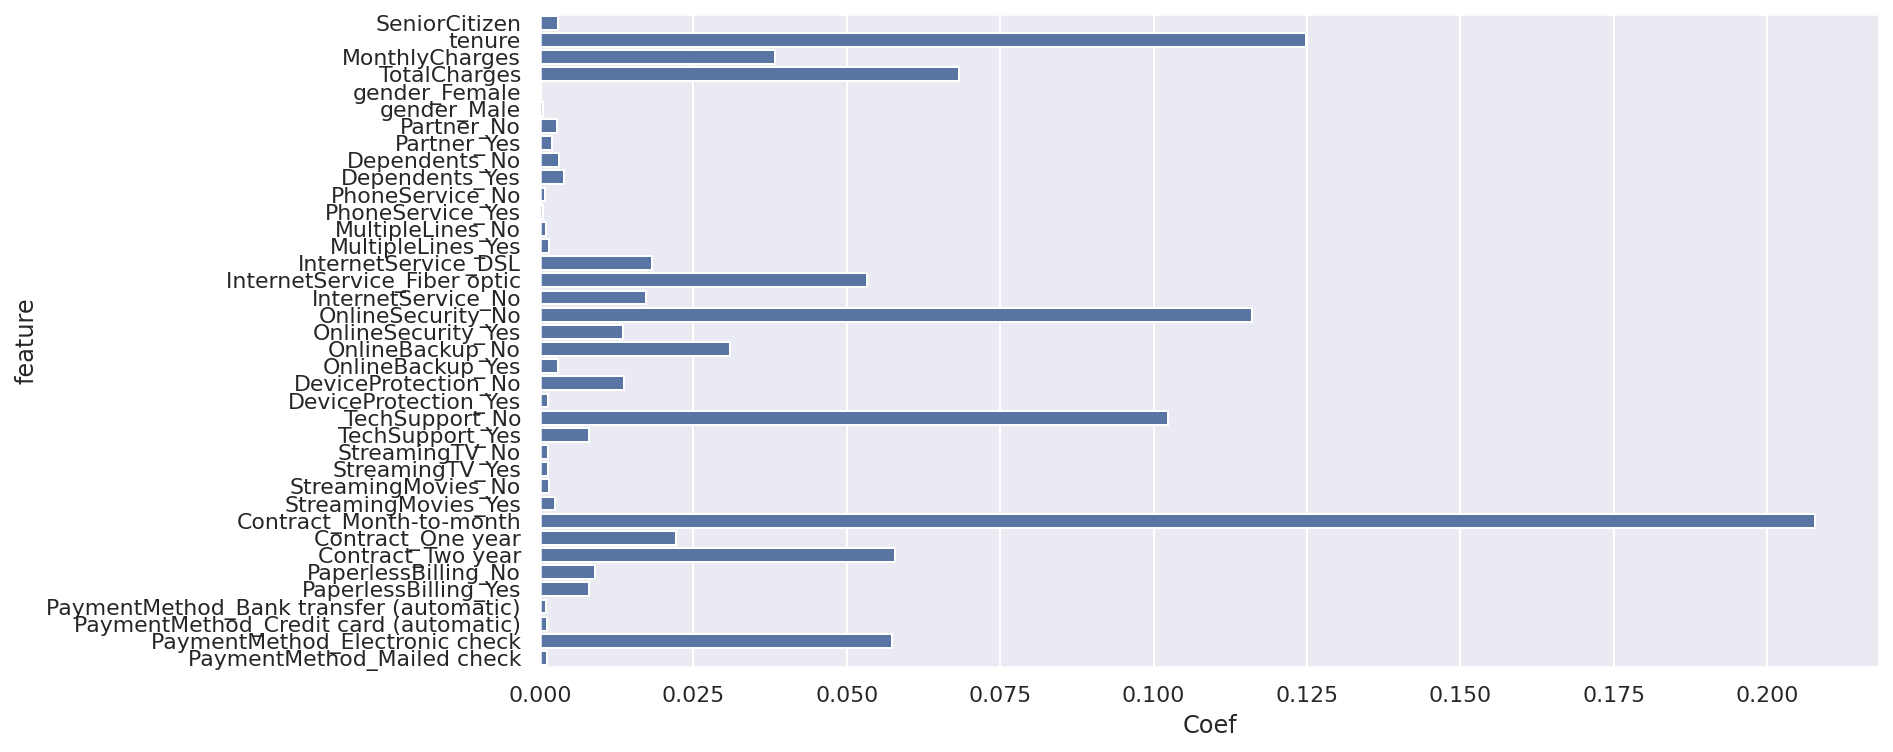

In [0]:
feature_imp = rfc.feature_importances_

featureMap= [(feature_names[i],feature_imp[i]) for i in range(len(feature_names))]

rf_data= pd.DataFrame(featureMap) 
rf_data.columns = ["feature","Coef"]
feature = rf_data["feature"]
coef = rf_data['Coef'].sort_values().abs()

#plot features and their coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

In [0]:
for score, name in sorted(zip(feature_imp, feature_names), reverse=True):
    print('{0}: {1}'.format(name, score))

Contract_Month-to-month: 0.20787522921357435
tenure: 0.12486314528431922
OnlineSecurity_No: 0.11596882509079089
TechSupport_No: 0.1023514213709757
TotalCharges: 0.06832915778162235
Contract_Two year: 0.05789838921746592
PaymentMethod_Electronic check: 0.057300641684972474
InternetService_Fiber optic: 0.053278082663109266
MonthlyCharges: 0.03829368457009305
OnlineBackup_No: 0.03089979397722557
Contract_One year: 0.02214565003680433
InternetService_DSL: 0.01832908044269797
InternetService_No: 0.017332598666934734
DeviceProtection_No: 0.013614593966048421
OnlineSecurity_Yes: 0.013502825685183387
PaperlessBilling_No: 0.008988400388415934
PaperlessBilling_Yes: 0.008011698583674192
TechSupport_Yes: 0.007977590378240213
Dependents_Yes: 0.003956052880975848
Dependents_No: 0.0030770635665125926
OnlineBackup_Yes: 0.002879938471427251
SeniorCitizen: 0.0028579564926310766
Partner_No: 0.002753121539378364
StreamingMovies_Yes: 0.0023698637352656897
Partner_Yes: 0.0019186611228585188
StreamingMovies_

## Random Forest Classification Algorithm using Over-Sampled data on k=10 folds

Test AUC score = 0.8264

FOLD  0  AUC ............... 0.8830297416294872
FOLD  1  AUC ............... 0.8806524045987254
FOLD  2  AUC ............... 0.8855595096412595
FOLD  3  AUC ............... 0.8508023146058192
FOLD  4  AUC ............... 0.8719990150613535
FOLD  5  AUC ............... 0.8867936143144416
FOLD  6  AUC ............... 0.8785095767695186
FOLD  7  AUC ............... 0.878875997396948
FOLD  8  AUC ............... 0.8715534475783995
FOLD  9  AUC ............... 0.865423963322761
Validation RF AUC-ROC : 0.8753199584918715


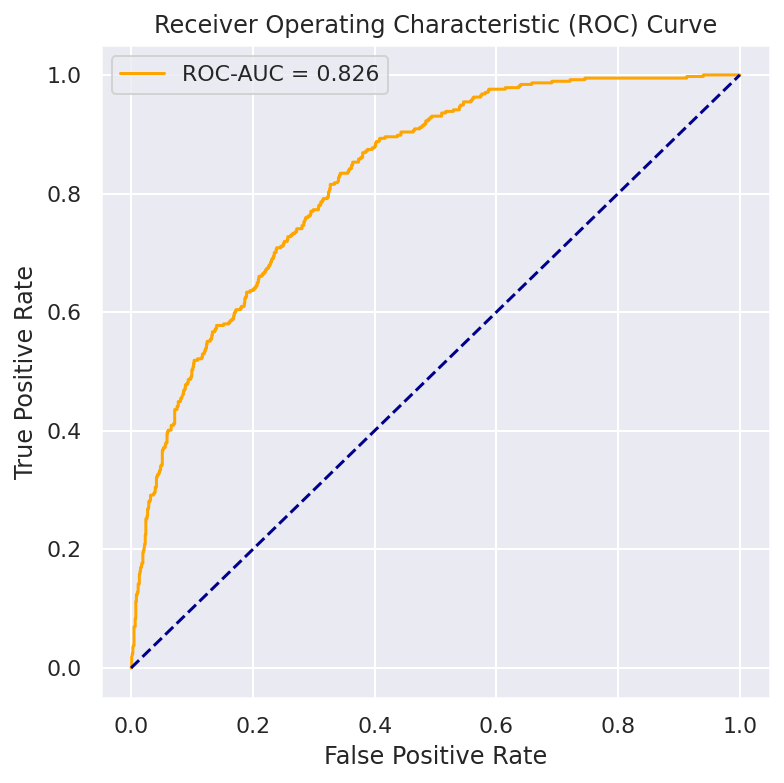

Test AUC:  0.8264219266867181


In [0]:
fold=0
avg_val_auc=[]
rfc2 = RandomForestClassifier(n_estimators=200,max_depth=4,max_features=6,random_state=35)

for tr_idx, val_idx in kf.split(X_sampled,y_sampled):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_sampled.iloc[tr_idx], X_sampled.iloc[val_idx], y_sampled[tr_idx], y_sampled[val_idx]
  
  #apply the model
  rfc2.fit(X_train_cv,y_train_cv)

  #test the model accuracy
  y_pred_cv = rfc2.predict(X_val_cv) #prediction 
  y_scores_cv = rfc2.predict_proba(X_val_cv)[:,1] #probabilities
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)
  #print all the scores 
  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation RF AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_rf2 = rfc2.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_rf2)
test_auc=roc_auc_score(y_test, y_hat_prob_rf2)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)


## k-Nearest Neighbor Algorithm on k=10 folds

Test AUC score = 0.8063

FOLD  0  AUC ............... 0.8227360774818402
FOLD  1  AUC ............... 0.8289346246973366
FOLD  2  AUC ............... 0.8148991121872478
FOLD  3  AUC ............... 0.8479822437449556
FOLD  4  AUC ............... 0.8370298627925747
FOLD  5  AUC ............... 0.8146074719274582
FOLD  6  AUC ............... 0.7861286705559256
FOLD  7  AUC ............... 0.8086598306709785
FOLD  8  AUC ............... 0.8633505045744836
FOLD  9  AUC ............... 0.8439881697190308
Validation kNN AUC-ROC : 0.8268316568351832


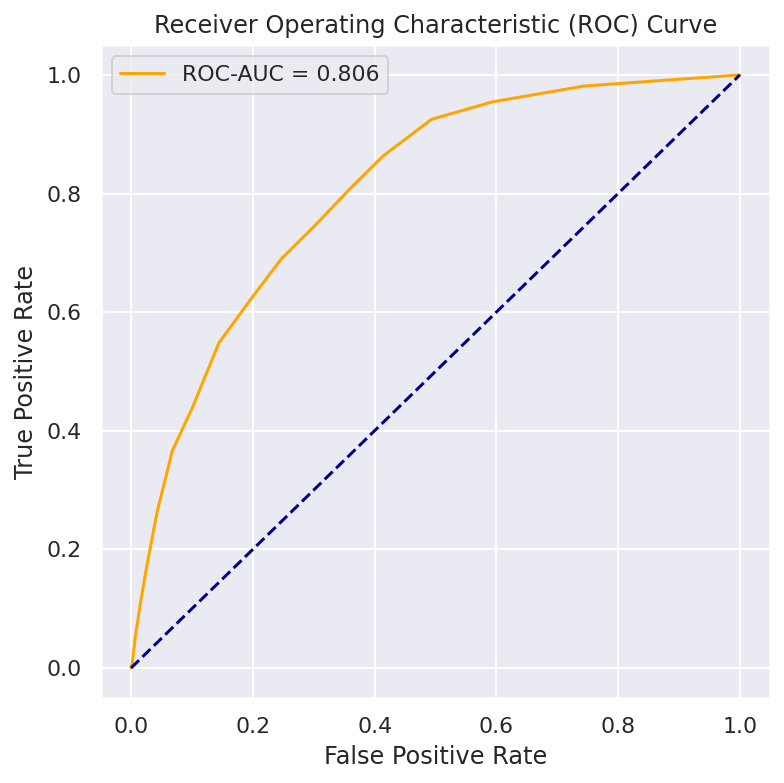

Test AUC:  0.806329625047238


In [0]:
fold=0
avg_val_auc=[]
knn = KNeighborsClassifier(n_neighbors=17)
# can also split the data using KFold

for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]

  knn.fit(X_train_cv,y_train_cv)
  
  y_pred_cv = knn.predict(X_val_cv)
  y_scores_cv = knn.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation kNN AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_knn = knn.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_knn)
test_auc=roc_auc_score(y_test, y_hat_prob_knn)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)


In [0]:
#Confusion Matrix

confmat = confusion_matrix(y_test, knn.predict(X_test))
con = pd.DataFrame(confmat)
con.columns = ["True","False"]
con.index = ["True","False"] 
con.head()

True  False
True    884    149
False   169    205

## Support Vector Classifier Algorithm with k=10 folds

Test AUC score = 0.7023

FOLD  0  AUC ............... 0.6958192090395482
FOLD  1  AUC ............... 0.7128006456820016
FOLD  2  AUC ............... 0.7452058111380145
FOLD  3  AUC ............... 0.7200645682001614
FOLD  4  AUC ............... 0.7288539144471348
FOLD  5  AUC ............... 0.7201358532265142
FOLD  6  AUC ............... 0.701764791913808
FOLD  7  AUC ............... 0.6864731787379951
FOLD  8  AUC ............... 0.7261891219916473
FOLD  9  AUC ............... 0.7573248614654599
Validation SVM AUC-ROC : 0.7194631955842284


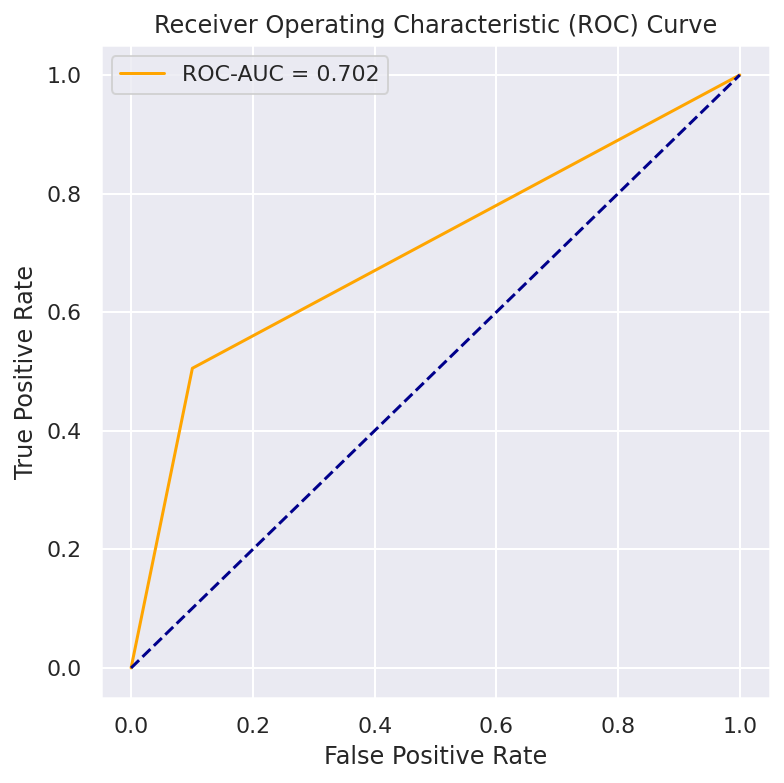

Test AUC:  0.7023349778175813


In [0]:
fold=0
avg_val_auc=[]
model_svm = SVC(kernel='linear',random_state=42)
for tr_idx, val_idx in kf.split(X_train,y_train):
  
  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]

  model_svm.fit(X_train_cv, y_train_cv ) 
  
  y_pred_cv = model_svm.predict(X_val_cv)
  auc = roc_auc_score(y_val_cv, y_pred_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation SVM AUC-ROC :",np.mean(avg_val_auc))
y_hat_svm = model_svm.predict(X_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_svm)
test_auc=roc_auc_score(y_test, y_hat_svm)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

## Support Vector Classifier Algorithm using Over-Sampled data on k=10 folds

Test AUC score = 0.7219

FOLD  0  AUC ............... 0.7772397094430993
FOLD  1  AUC ............... 0.7687651331719129
FOLD  2  AUC ............... 0.7506053268765134
FOLD  3  AUC ............... 0.7457627118644068
FOLD  4  AUC ............... 0.7530266343825667
FOLD  5  AUC ............... 0.7506053268765133
FOLD  6  AUC ............... 0.7360774818401936
FOLD  7  AUC ............... 0.761501210653753
FOLD  8  AUC ............... 0.7360774818401938
FOLD  9  AUC ............... 0.7324455205811138
Validation SVM AUC-ROC : 0.7512106537530265


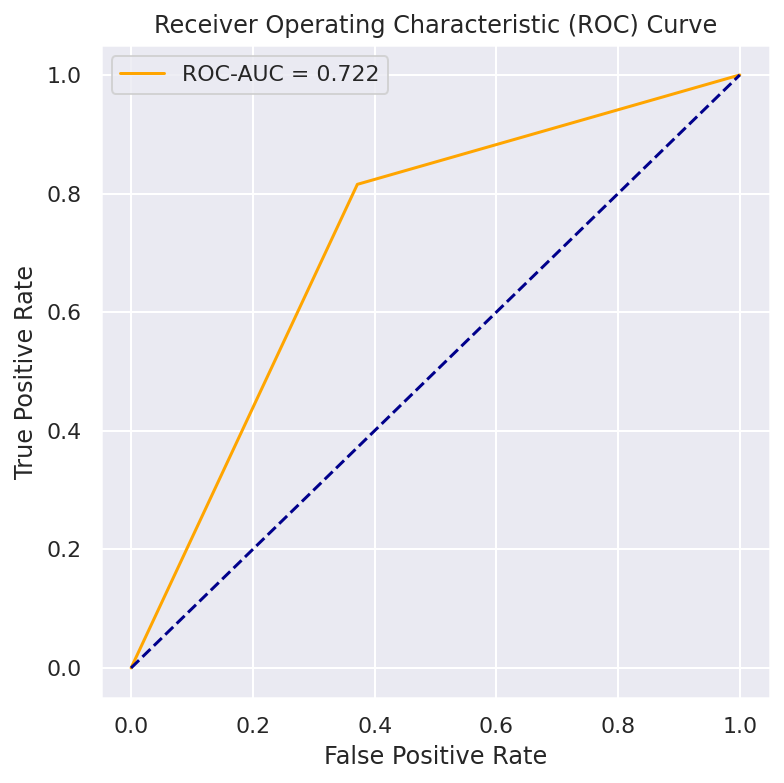

Test AUC:  0.7218876021763101


In [0]:
fold=0
avg_val_auc=[]
model_svm = SVC(kernel='linear',random_state=42)
for tr_idx, val_idx in kf.split(X_sampled,y_sampled):
  
  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_sampled.iloc[tr_idx], X_sampled.iloc[val_idx], y_sampled[tr_idx], y_sampled[val_idx]

  model_svm.fit(X_train_cv, y_train_cv ) 
  
  y_pred_cv = model_svm.predict(X_val_cv)
  auc = roc_auc_score(y_val_cv, y_pred_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation SVM AUC-ROC :",np.mean(avg_val_auc))
y_hat_svm = model_svm.predict(X_test)
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_svm)
test_auc=roc_auc_score(y_test, y_hat_svm)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

## XGBoost Algorithm on k=10 folds

Test AUC score = 0.8375

FOLD  0  AUC ............... 0.846957223567393
FOLD  1  AUC ............... 0.8388216303470539
FOLD  2  AUC ............... 0.860129136400323
FOLD  3  AUC ............... 0.8702421307506053
FOLD  4  AUC ............... 0.867901533494754
FOLD  5  AUC ............... 0.8414856102832442
FOLD  6  AUC ............... 0.8133643174025383
FOLD  7  AUC ............... 0.8248452150738579
FOLD  8  AUC ............... 0.8738807546679234
FOLD  9  AUC ............... 0.8708094317240035
Validation XGB AUC-ROC : 0.8508436983711697


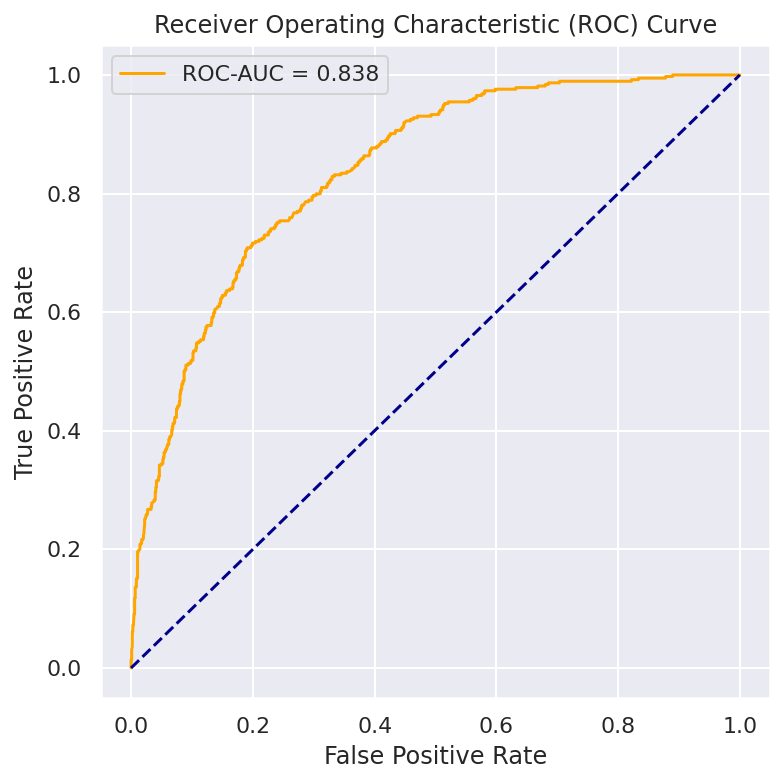

Test AUC:  0.8375209011704655


In [0]:
fold=0
avg_val_auc=[]
xgb_model = XGBClassifier(max_depth=2,max_features=6,learning_rate =0.09,random_state=11)
for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]
  
  
  xgb_model.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = xgb_model.predict(X_val_cv)
  y_scores_cv = xgb_model.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1


print("Validation XGB AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_xgb = xgb_model.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_xgb)
test_auc=roc_auc_score(y_test, y_hat_prob_xgb)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)


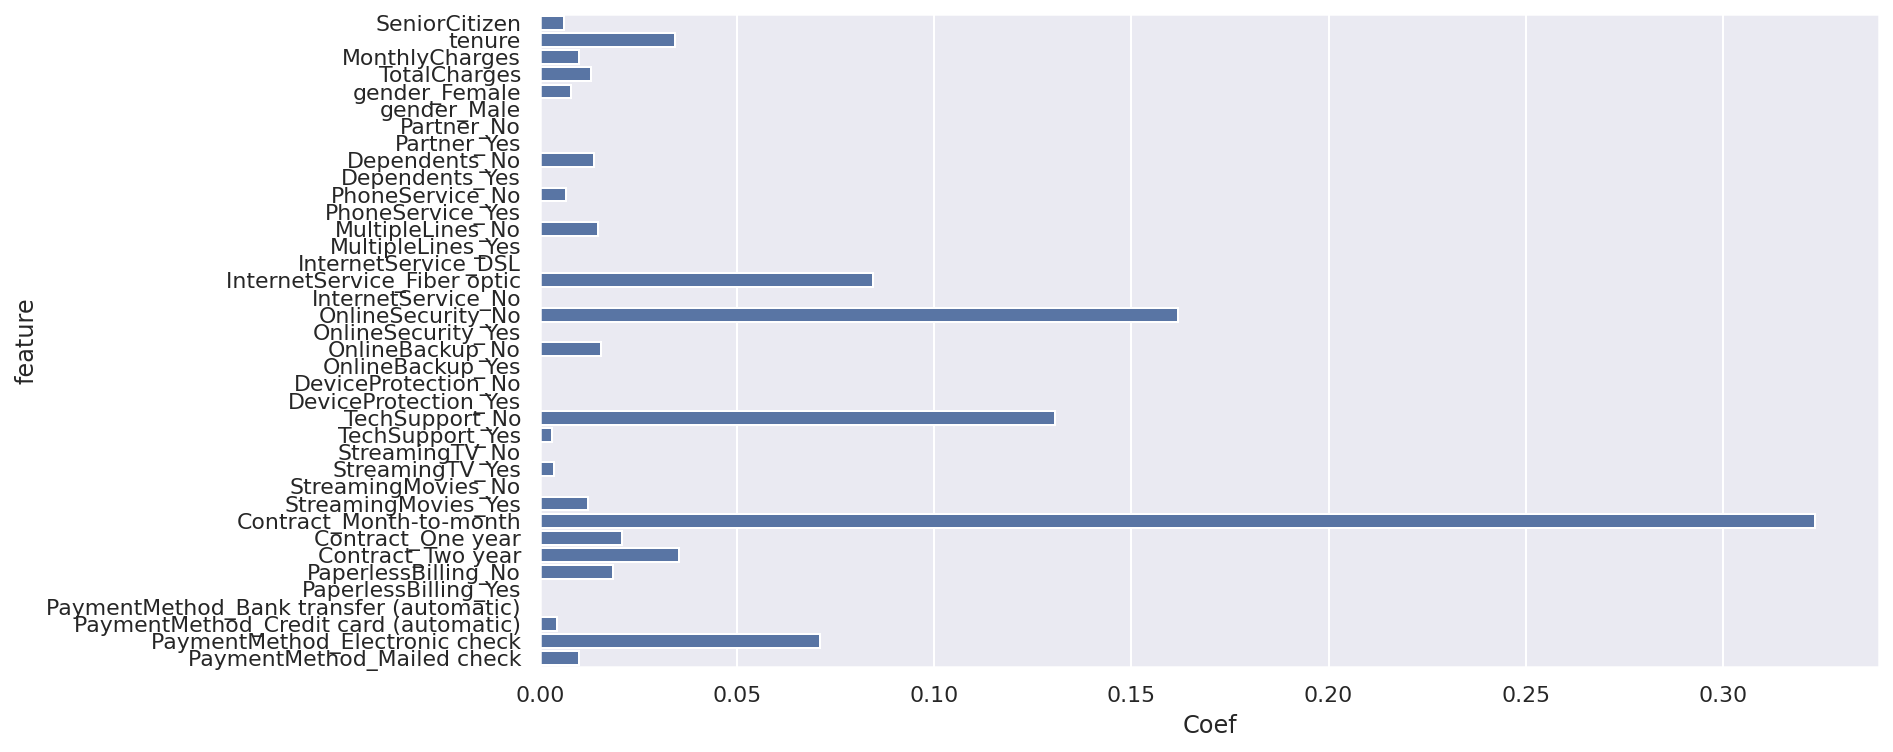

In [0]:
#Plot feature coefficients

all_feature_cols = X_train.columns
xgb_model.feature_importances_

#featureMap
featureMap= [(all_feature_cols[i],xgb_model.feature_importances_[i]) for i in range(len(all_feature_cols))]

#type(featureMap)
xgb_data= pd.DataFrame(featureMap) 
xgb_data.columns = ["feature","Coef"]
feature = xgb_data["feature"]
coef = xgb_data['Coef'].sort_values().abs()

#plot features and their coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

In [0]:
total=0
xgb_features_to_keep=[]
xgb_features_to_drop=[]
for score, name in sorted(zip(xgb_model.feature_importances_, X_train.columns), reverse=True):
  if(total<0.8):
    print('{0}: {1}'.format(name, score))
    total+=score
    xgb_features_to_keep.append(name)
  else:
    xgb_features_to_drop.append(name)
X_reduced_xgb = X_train.drop(columns=xgb_features_to_drop,axis=1)
X_test_reduced_xgb = X_test.drop(columns=xgb_features_to_drop,axis=1)

Contract_Month-to-month: 0.3234676420688629
OnlineSecurity_No: 0.16173802316188812
TechSupport_No: 0.13060195744037628
InternetService_Fiber optic: 0.08442296087741852
PaymentMethod_Electronic check: 0.07094629108905792
Contract_Two year: 0.03524080663919449


# Logistic Regression Algorithm on k=10 folds

Test AUC score = 0.8359

FOLD  0  AUC ............... 0.8404277643260694
FOLD  1  AUC ............... 0.8369814366424535
FOLD  2  AUC ............... 0.8628410008071025
FOLD  3  AUC ............... 0.8651008878127523
FOLD  4  AUC ............... 0.8548022598870056
FOLD  5  AUC ............... 0.8388449225669109
FOLD  6  AUC ............... 0.799502738190032
FOLD  7  AUC ............... 0.8269821408258445
FOLD  8  AUC ............... 0.87155694947755
FOLD  9  AUC ............... 0.8696069031639502
Validation LR AUC-ROC : 0.8466647003699672


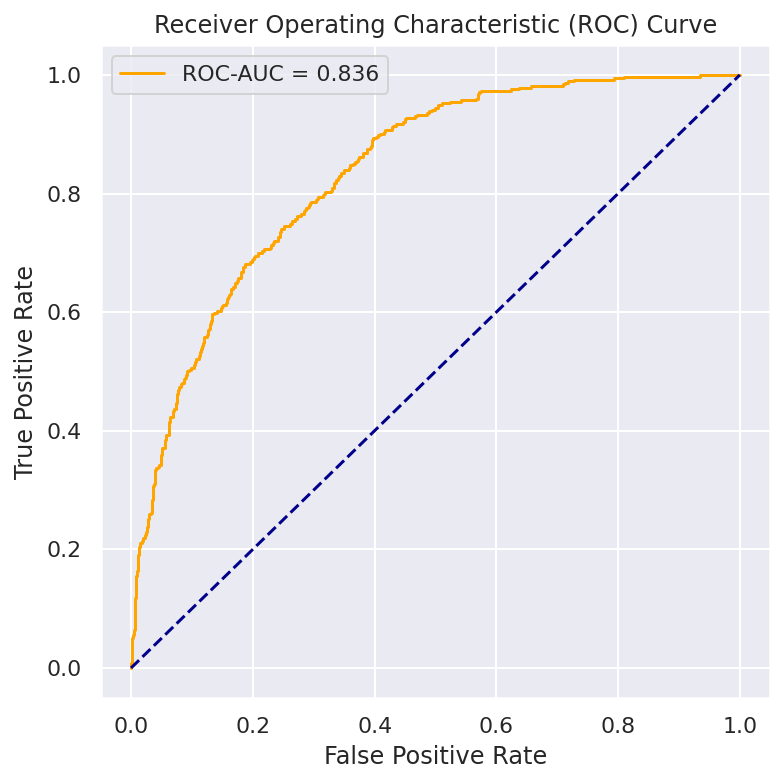

Test AUC:  0.8358733971455343


In [0]:
fold=0
avg_val_auc=[]
logistic = LogisticRegression(class_weight='newton-cg',multi_class='ovr', max_iter=1000, random_state=17)
for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]

  logistic.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = logistic.predict(X_val_cv)
  y_scores_cv = logistic.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation LR AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_lr = logistic.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_lr)
test_auc=roc_auc_score(y_test, y_hat_prob_lr)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

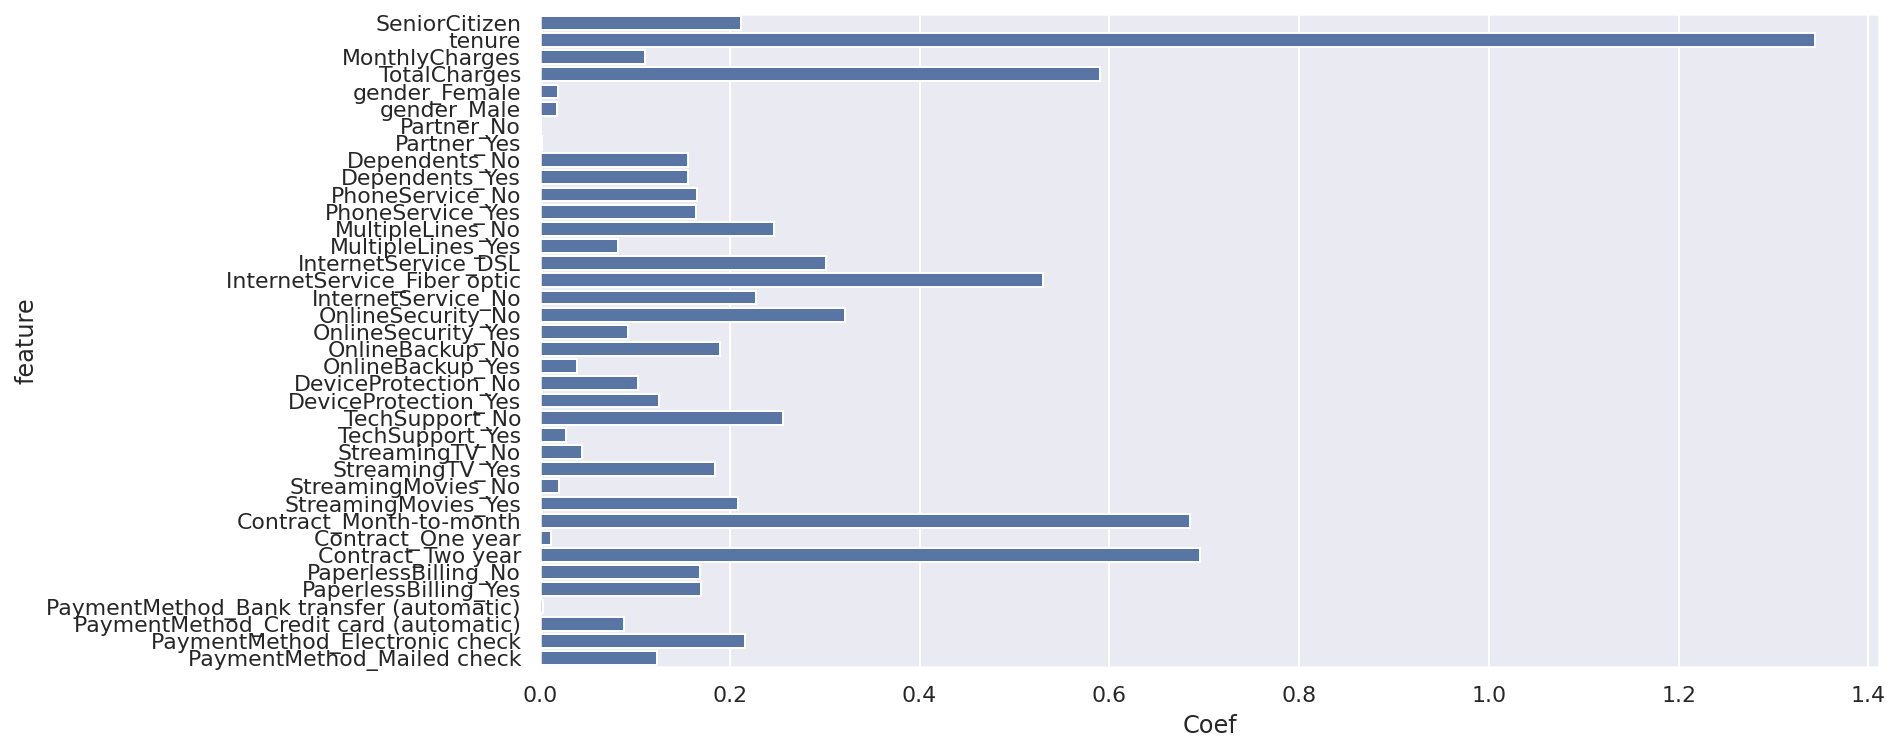

In [0]:
all_feature_cols = X_train #features
coef_col = logistic.coef_[0] #coefficients
z =list(zip(all_feature_cols, coef_col)) 
logistic_data = pd.DataFrame(z)
logistic_data.columns = ["feature","Coef"]
feature = logistic_data["feature"]
coef = logistic_data['Coef'].sort_values().abs()

#plot features and their coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

# Linear Discriminant Analysis Algorithm on k=10 folds

Test AUC score = 0.8299

In [0]:
#combine the features and target labels into a dataframe

# get all the feature column names
features = processedData.columns #data.columns = original data columns
features = features.drop("customerID")

# combine the X and Y data
fullData = np.column_stack((X_train, y_train)) #training
finalDF = pd.DataFrame(data=fullData, columns=features)

fullTestData = np.column_stack((X_test, y_test)) #testing
finalTestDF = pd.DataFrame(data=fullTestData, columns=features)

In [0]:
from statsmodels.stats.outliers_influence import variance_inflation_factor    
#VIF function from: https://stats.stackexchange.com/questions/155028/how-to-systematically-remove-collinear-variables-in-python
#Use VIF function to eliminate collinearity to increase statistical significance

def calculate_vif_(X, thresh=5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]

        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X.iloc[:, variables].columns[maxloc] +
                  '\' at index: ' + str(maxloc))
            del variables[maxloc]
            dropped = True

    print('Remaining variables:')
    print(X.columns[variables])
    print('----------------------------------------------------------')
    return X.iloc[:, variables]

ColData=calculate_vif_(finalDF)
ColTestData=calculate_vif_(finalTestDF)
ColData.head(5)

dropping 'gender_Female' at index: 4
dropping 'Partner_No' at index: 5
dropping 'Dependents_No' at index: 6
dropping 'PhoneService_No' at index: 7
dropping 'PhoneService_Yes' at index: 7
dropping 'InternetService_DSL' at index: 9
dropping 'InternetService_No' at index: 10
dropping 'OnlineSecurity_No' at index: 10
dropping 'OnlineBackup_No' at index: 11
dropping 'DeviceProtection_No' at index: 12
dropping 'TechSupport_No' at index: 13
dropping 'StreamingTV_No' at index: 14
dropping 'Contract_Month-to-month' at index: 17
dropping 'PaperlessBilling_No' at index: 19
dropping 'PaymentMethod_Electronic check' at index: 22
dropping 'TotalCharges' at index: 3
dropping 'InternetService_Fiber optic' at index: 8
dropping 'StreamingMovies_Yes' at index: 14
Remaining variables:
Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'gender_Male',
       'Partner_Yes', 'Dependents_Yes', 'MultipleLines_No',
       'MultipleLines_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Ye

SeniorCitizen    tenure  ...  PaymentMethod_Mailed check  Churn_Yes
0            0.0  0.879182  ...                         0.0        1.0
1            0.0  1.612573  ...                         0.0        0.0
2            0.0 -1.198760  ...                         0.0        0.0
3            1.0  0.430998  ...                         0.0        0.0
4            0.0  1.612573  ...                         0.0        0.0

[5 rows x 21 columns]

In [0]:
# get the updated data with collinearity checks

X_train_lda = ColData.drop(target, axis=1)
y_train_lda = ColData[target]

X_test_lda = ColTestData.drop(target, axis=1)
y_test_lda = ColTestData[target]

FOLD  0  AUC ............... 0.8317917675544794
FOLD  1  AUC ............... 0.8303793381759484
FOLD  2  AUC ............... 0.8574656981436642
FOLD  3  AUC ............... 0.8545117029862792
FOLD  4  AUC ............... 0.8515092816787733
FOLD  5  AUC ............... 0.8320035100833646
FOLD  6  AUC ............... 0.7877862099224858
FOLD  7  AUC ............... 0.8255033557046981
FOLD  8  AUC ............... 0.8710856882850968
FOLD  9  AUC ............... 0.8649917935550969
Validation LDA AUC-ROC : 0.8407028346089888


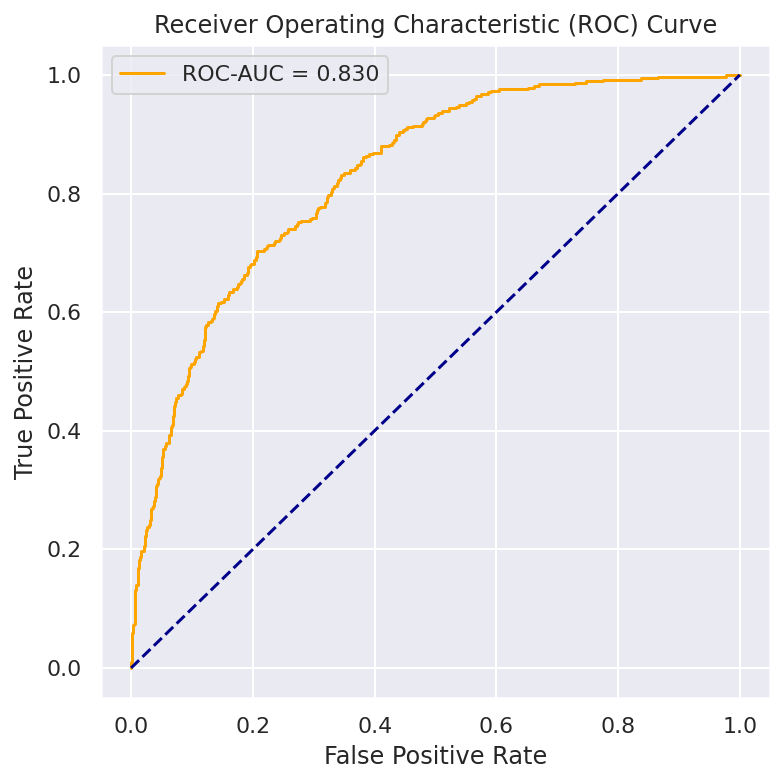

Test AUC:  0.8298994155437411


In [0]:
fold=0
avg_val_auc=[]
lda = LDA(solver='eigen',shrinkage=0.2,tol=0.07)
for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]
  
  lda.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = lda.predict(X_val_cv)
  y_scores_cv = lda.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation LDA AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_lda = lda.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test_lda, y_hat_prob_lda)
test_auc=roc_auc_score(y_test_lda, y_hat_prob_lda)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

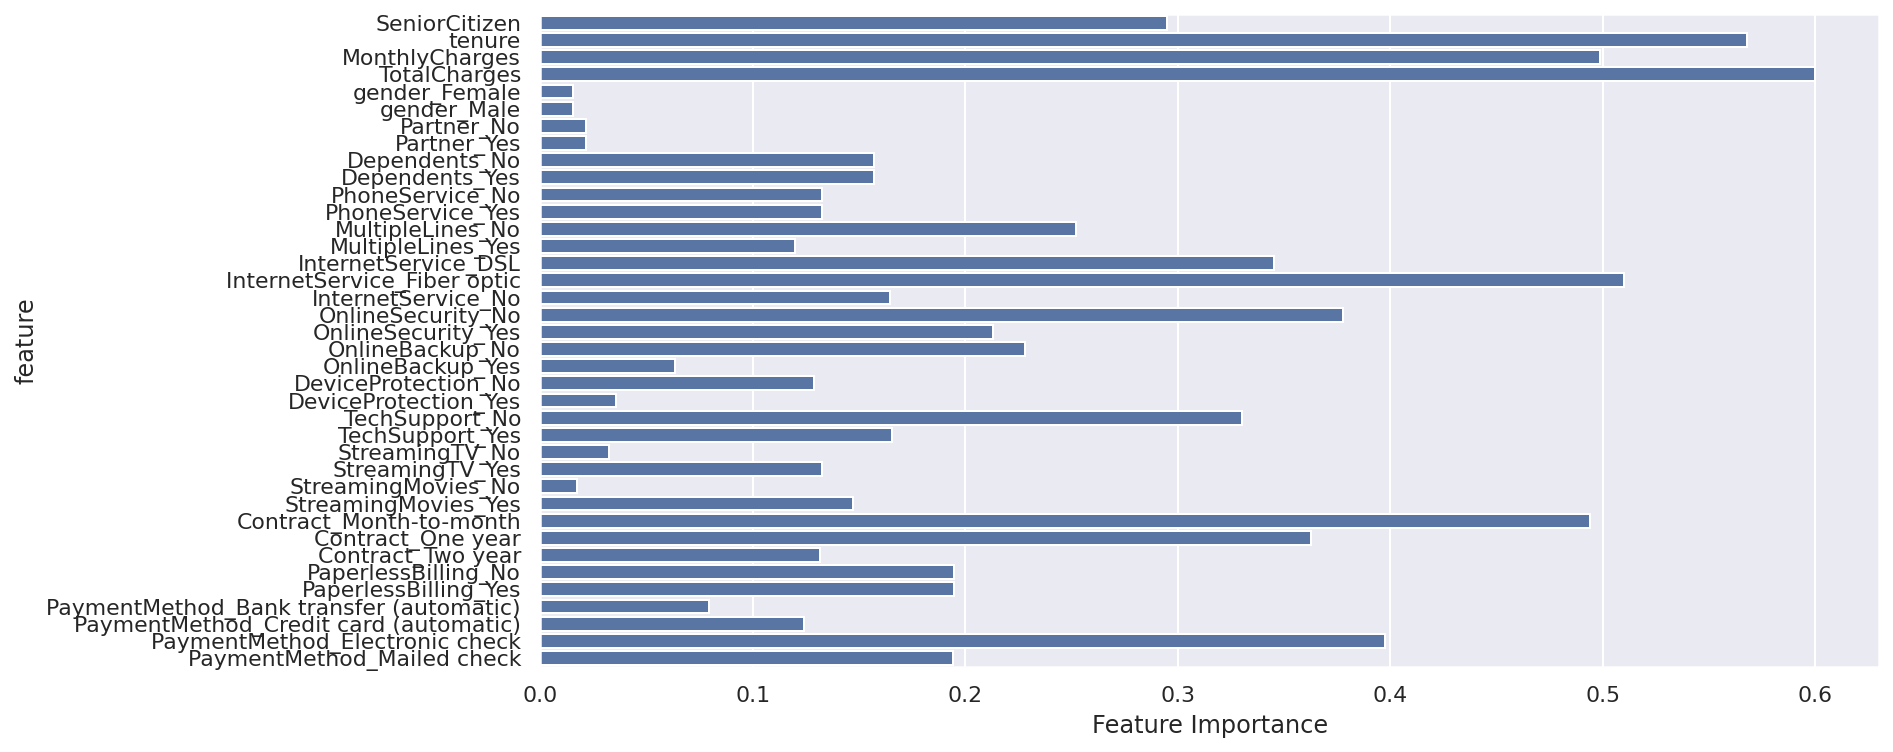

In [0]:
feature_Col = X_train #features
coef_col = lda.coef_[0] #coefficients
z =list(zip(feature_Col,coef_col)) 
lda_data = pd.DataFrame(z)
lda_data.columns = ["feature","Feature Importance"]
feature = lda_data["feature"]
coef = lda_data['Feature Importance'].sort_values().abs()

#plot features and its coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

# Quadratic Discriminant Analysis Algorithm

Best AUC score = 0.7837

FOLD  0  AUC ............... 0.7456900726392253
FOLD  1  AUC ............... 0.7736561743341405
FOLD  2  AUC ............... 0.735593220338983
FOLD  3  AUC ............... 0.8181598062953995
FOLD  4  AUC ............... 0.7860371267150927
FOLD  5  AUC ............... 0.7667257097356062
FOLD  6  AUC ............... 0.7466808586703932
FOLD  7  AUC ............... 0.7368006240148204
FOLD  8  AUC ............... 0.7672782228577928
FOLD  9  AUC ............... 0.840356208459951
Validation QDA AUC-ROC : 0.7716978024061405


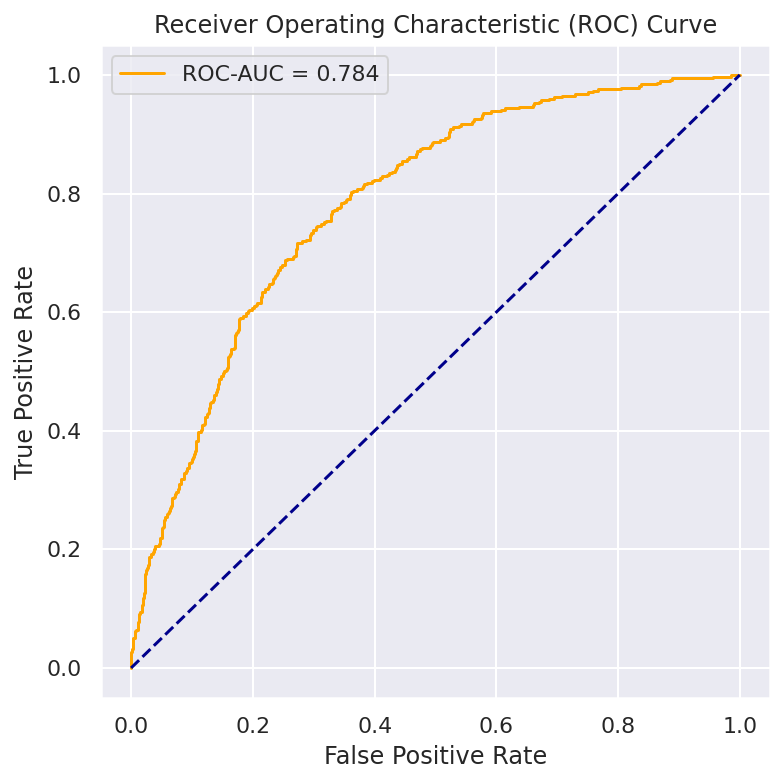

Test AUC:  0.7837227120012838


In [0]:
fold=0
avg_val_auc=[]
qda = QDA(tol=0.4)

for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]

  qda.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = qda.predict(X_val_cv)
  y_scores_cv = qda.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation QDA AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_qda = qda.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test_lda, y_hat_prob_qda)
test_auc=roc_auc_score(y_test_lda, y_hat_prob_qda)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

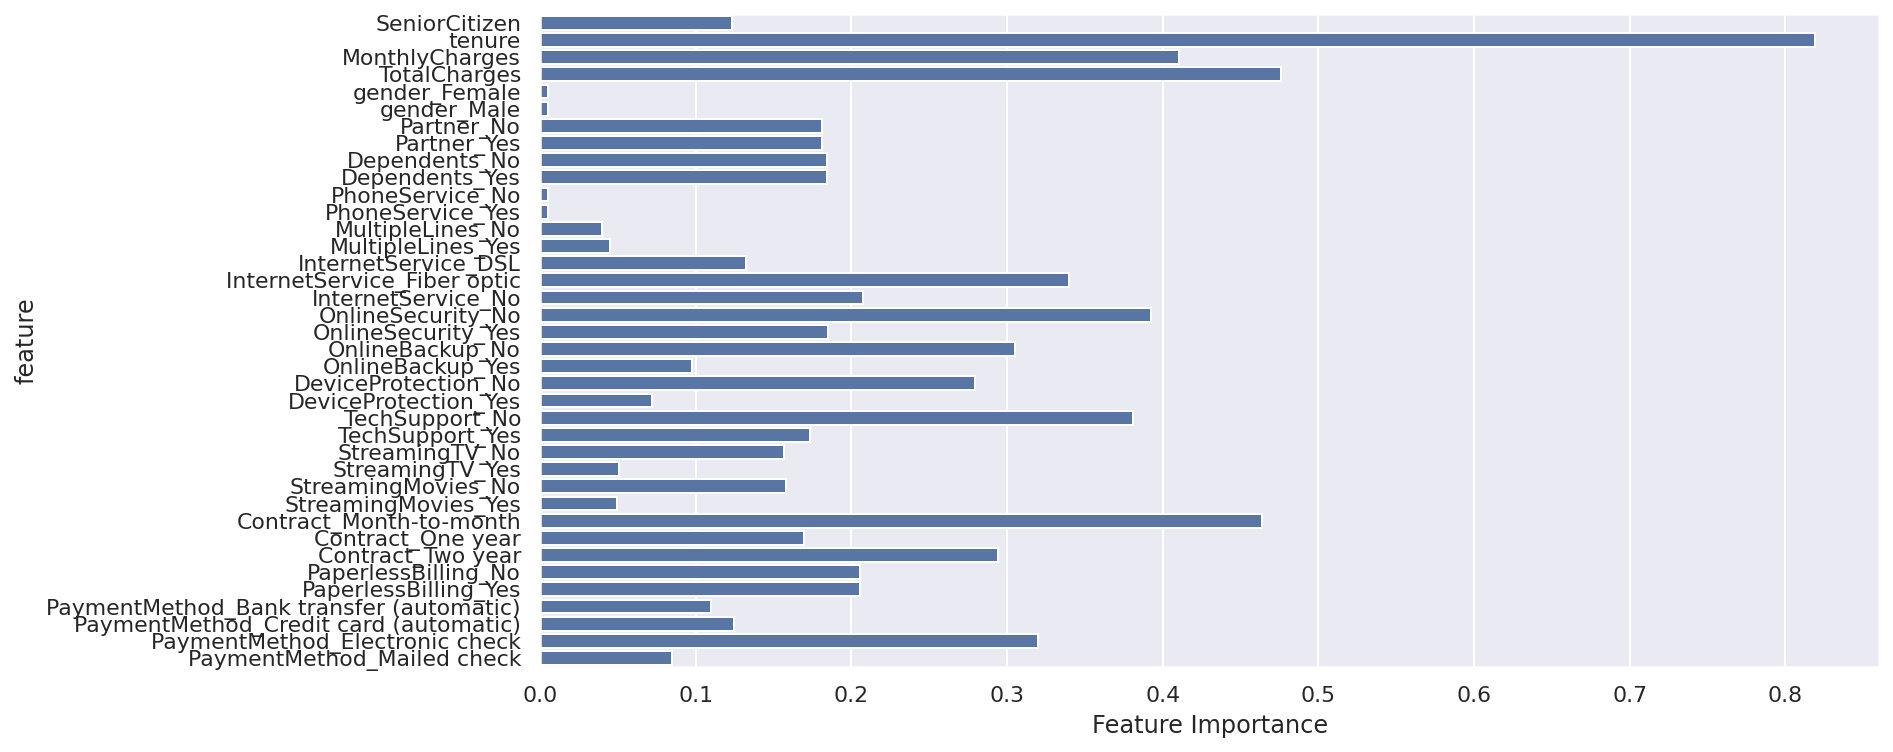

In [0]:
feature_Col = X_train #features
coef_col =  qda.means_[0] - qda.means_[1] #coefficients
z =list(zip(feature_Col,coef_col)) 
qda_data = pd.DataFrame(z)
qda_data.columns = ["feature","Feature Importance"]
feature = qda_data["feature"]
coef = qda_data['Feature Importance'].sort_values().abs()

#plot features and its coefficients
fig = plt.figure(figsize=(12,6))
sns.barplot(y = feature, x = coef, color='b')

# Naive Bayes Algorithm

Best AUC score = 0.8185

FOLD  0  AUC ............... 0.8271105730427764
FOLD  1  AUC ............... 0.8257142857142857
FOLD  2  AUC ............... 0.8432606941081517
FOLD  3  AUC ............... 0.8455528652138822
FOLD  4  AUC ............... 0.8461662631154158
FOLD  5  AUC ............... 0.8254708549328047
FOLD  6  AUC ............... 0.7746396476916326
FOLD  7  AUC ............... 0.827502153176138
FOLD  8  AUC ............... 0.8700131628126169
FOLD  9  AUC ............... 0.8352373368867511
Validation GNB AUC-ROC : 0.8320667836694456


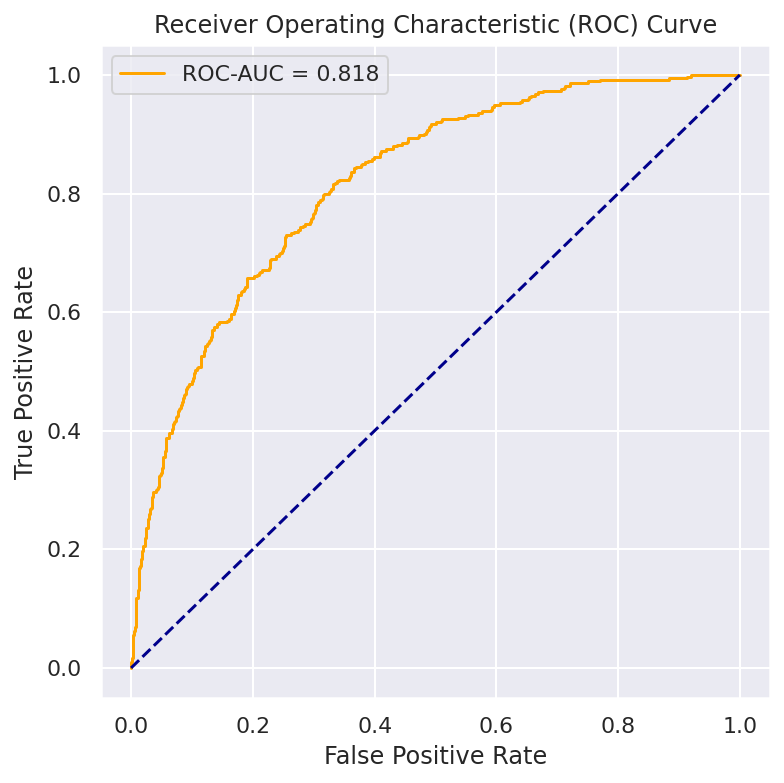

Test AUC:  0.8184898354307841


In [0]:
fold=0
avg_val_auc=[]
gnb = GaussianNB(var_smoothing=5)
for tr_idx, val_idx in kf.split(X_train,y_train):

  X_train_cv, X_val_cv, y_train_cv, y_val_cv = X_train.iloc[tr_idx], X_train.iloc[val_idx], y_train.iloc[tr_idx], y_train.iloc[val_idx]
  
  gnb.fit(X_train_cv, y_train_cv)
 
  y_pred_cv = gnb.predict(X_val_cv)
  y_scores_cv = gnb.predict_proba(X_val_cv)[:,1]
  auc = roc_auc_score(y_val_cv, y_scores_cv)
  avg_val_auc.append(auc)

  print('FOLD ',str(fold) , ' AUC ...............' ,auc)
  fold+=1

print("Validation GNB AUC-ROC :",np.mean(avg_val_auc))
y_hat_prob_gnb = gnb.predict_proba(X_test)[:,1]
test_fpr, test_tpr, thresholds = roc_curve(y_test, y_hat_prob_gnb)
test_auc=roc_auc_score(y_test, y_hat_prob_gnb)
plot_roc_curve_custom(test_fpr, test_tpr, test_auc)
print("Test AUC: ",test_auc)

# Average Ensembling using Algorithms that produce more than 0.83 AUC

Best AUC score = 0.831

In [0]:
finalpred = (y_hat_prob_lasso+y_hat_prob_rf+y_hat_prob_xgb+y_hat_prob_lr+y_hat_prob_lda+y_hat_prob_qda+y_hat_prob_gnb)/7

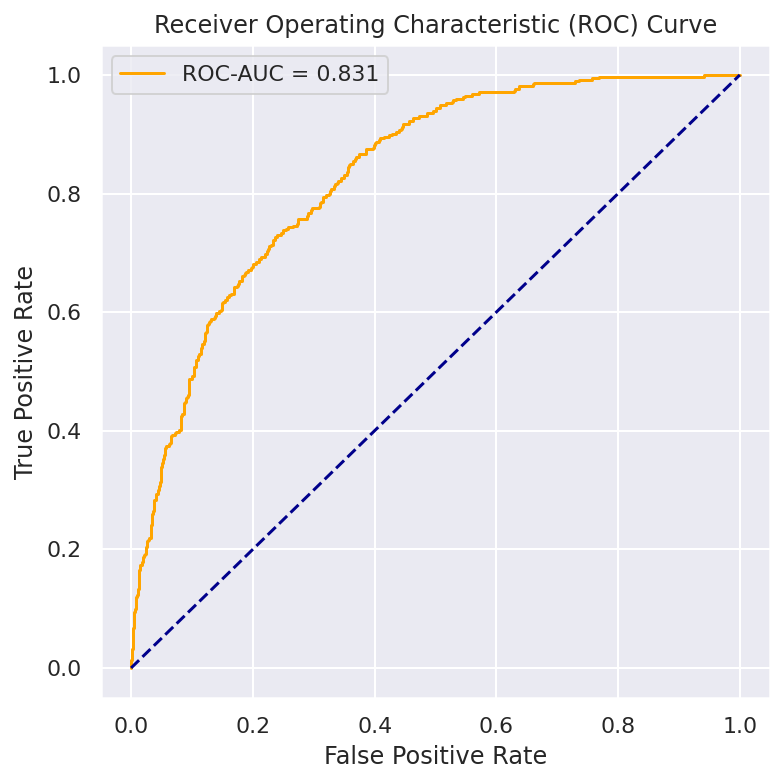

Ensemble Test AUC:  0.8309218257398885


In [0]:
f_test_fpr, f_test_tpr, f_thresholds = roc_curve(y_test, finalpred)
f_test_auc=roc_auc_score(y_test, finalpred)
plot_roc_curve_custom(f_test_fpr, f_test_tpr, f_test_auc)
print("Ensemble Test AUC: ",f_test_auc)